In [1]:
import pandas as pd
import numpy as np
import warnings 

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
oto = pd.read_json("scout_car.json", orient = "records", lines = True)

In [3]:
oto.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfernbedienung, , Elektrische Luftzusatzheizung, Interieur:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-8-tfsi-sport-gasoline-red-b2547f8a-e83f-6237-e053-e250040a56df,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\nLangstreckenfahrzeug daher die hohe Kilometerl

##  Now let's try to examine our dataframe (oto)

In [4]:
oto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   url                            object 
 1   make_model                     object 
 2   short_description              object 
 3   body_type                      object 
 4   price                          int64  
 5   vat                            object 
 6   km                             object 
 7   registration                   object 
 8   prev_owner                     object 
 9   kW                             float64
 10  hp                             object 
 11  Type                           object 
 12  Previous Owners                object 
 13  Next Inspection                object 
 14  Inspection new                 object 
 15  Warranty                       object 
 16  Full Service                   object 
 17  Non-smoking Vehicle            object 
 18  null  

In [5]:
oto.describe()

,price,kW
count,15919.000000,0.0
mean,18019.896727,NaN
std,7386.169409,NaN
min,13.000000,NaN
25%,12850.000000,NaN
50%,16900.000000,NaN
75%,21900.000000,NaN
max,74600.000000,NaN


## Handling with Missing Values.

- **Identifying the amount of the Missing Values**

In [6]:
oto.shape[0]

15919

In [7]:
oto.isnull().sum()*100/oto.shape[0]

url                                0.000000
make_model                         0.000000
short_description                  0.288963
body_type                          0.376908
price                              0.000000
vat                               28.349771
km                                 0.000000
registration                       0.000000
prev_owner                        42.892141
kW                               100.000000
hp                                 0.000000
Type                               0.012564
Previous Owners                   41.711163
Next Inspection                   77.793831
Inspection new                    75.299956
Warranty                          34.047365
Full Service                      48.395000
Non-smoking Vehicle               54.915510
null                               0.000000
Make                               0.000000
Model                              0.000000
Offer Number                      19.944720
First Registration              

In [8]:
col_list = list(oto.columns)

In [9]:
col_list

['url',
 'make_model',
 'short_description',
 'body_type',
 'price',
 'vat',
 'km',
 'registration',
 'prev_owner',
 'kW',
 'hp',
 'Type',
 'Previous Owners',
 'Next Inspection',
 'Inspection new',
 'Warranty',
 'Full Service',
 'Non-smoking Vehicle',
 'null',
 'Make',
 'Model',
 'Offer Number',
 'First Registration',
 'Body Color',
 'Paint Type',
 'Body Color Original',
 'Upholstery',
 'Body',
 'Nr. of Doors',
 'Nr. of Seats',
 'Model Code',
 'Gearing Type',
 'Displacement',
 'Cylinders',
 'Weight',
 'Drive chain',
 'Fuel',
 'Consumption',
 'CO2 Emission',
 'Emission Class',
 '\nComfort & Convenience\n',
 '\nEntertainment & Media\n',
 '\nExtras\n',
 '\nSafety & Security\n',
 'description',
 'Emission Label',
 'Gears',
 'Country version',
 'Electricity consumption',
 'Last Service Date',
 'Other Fuel Types',
 'Availability',
 'Last Timing Belt Service Date',
 'Available from']

## Let's begin to implement EDA Process to all *columns*

> ### We'll begin with the variables which has high percentage of missing values(NaNs). 
> ### We can remove some of them. At the begining we can focus on the columns that have %35 precentage and higher of missing values.

In [10]:
def show_nans(oto, limit):
    missing = oto.isnull().sum()*100/oto.shape[0]
    return missing.loc[lambda x : x > limit]
show_nans(oto, 35)

prev_owner                        42.892141
kW                               100.000000
Previous Owners                   41.711163
Next Inspection                   77.793831
Inspection new                    75.299956
Full Service                      48.395000
Non-smoking Vehicle               54.915510
Paint Type                        36.258559
Model Code                        68.729192
Cylinders                         35.680633
Weight                            43.809285
Drive chain                       43.080596
Emission Label                    74.967021
Country version                   52.346253
Electricity consumption           99.139393
Last Service Date                 96.444500
Other Fuel Types                  94.472015
Availability                      96.011056
Last Timing Belt Service Date     99.899491
Available from                    98.291350
dtype: float64

- We can drop the columns which have 90 percentage or high of missing values.

- ``'Availability'``, ``'Available from'``, ``'Electricity consumption'``, ``'Last Service Date'``, ``'Last Timing Belt Service Date'``, ``'Other Fuel Types'``, ``'kW'``

In [11]:
drop_list1 = ['Availability','Available from','Electricity consumption','Last Service Date','Last Timing Belt Service Date',
         'Other Fuel Types','kW']

In [12]:
oto.drop(drop_list1, axis=1, inplace=True)

``'prev_owner'`` is very similar to ``'Previous Owners'``.  ``'Weight'`` and ``'Non-smoking Vehicle'`` are assumed that they don't have meaningful  effect on the result. So we can drop them all.

### ``"prev_owner"`` and ``"Previous Owners"``

In [13]:
oto[["prev_owner", "Previous Owners"]]

,prev_owner,Previous Owners
0,2 previous owners,\n2\n
1,None,NaN
2,1 previous owner,\n1\n
3,1 previous owner,\n1\n
4,1 previous owner,\n1\n
...,...,...
15914,None,NaN
15915,1 previous owner,"[\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (city), \n, 6.3 l/100 km (country), \n]"
15916,1 previous owner,"[\n1\n, \n139 g CO2/km (comb)\n]"
15917,None,NaN


#### These two columns are very similar to each other. Let's choose better of them.

In [14]:
oto["Previous Owners"]

0                                                                                            \n2\n
1                                                                                              NaN
2                                                                                            \n1\n
3                                                                                            \n1\n
4                                                                                            \n1\n
                                                   ...                                            
15914                                                                                          NaN
15915    [\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (city), \n, 6.3 l/100 km (country), \n]
15916                                                             [\n1\n, \n139 g CO2/km (comb)\n]
15917                                                                                          NaN
15918     

In [15]:
oto["prev_owner"]

0        2 previous owners
1                     None
2         1 previous owner
3         1 previous owner
4         1 previous owner
               ...        
15914                 None
15915     1 previous owner
15916     1 previous owner
15917                 None
15918     1 previous owner
Name: prev_owner, Length: 15919, dtype: object

In [16]:
oto["Previous Owners"].value_counts(dropna = False)

\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n111 g CO2/km (comb)\n]                                                                1
[\n1\n, \nEuro 6\n]                                                                             1
[\n2\n, \n119 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.6 l/100 km (comb), \n, 8.1 l/100 km (city), \n, 5.7 l/100 km (country), \n]       1
[\n2\n, \n137 g CO2/

In [17]:
oto["prev_owner"].value_counts(dropna = False)

1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

### ``'Previous Owners'``

In [18]:
oto["Previous Owners"].str.strip("\n")

0          2
1        NaN
2          1
3          1
4          1
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918      1
Name: Previous Owners, Length: 15919, dtype: object

In [19]:
oto["Previous Owners"].str.strip("\n").value_counts(dropna = False)

1      8101
NaN    6870
2       766
0       163
3        17
4         2
Name: Previous Owners, dtype: int64

In [20]:
oto["Previous Owners"].str[0]

0           \n
1          NaN
2           \n
3           \n
4           \n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918       \n
Name: Previous Owners, Length: 15919, dtype: object

In [21]:
oto['Previous Owners'].str[0].str[1]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915      1
15916      1
15917    NaN
15918    NaN
Name: Previous Owners, Length: 15919, dtype: object

In [22]:
oto['Previous Owners'].str[0].str[1].value_counts(dropna = False)

NaN    15689
1        193
0         25
2         12
Name: Previous Owners, dtype: int64

> ### We catch the values inside the lists.

> ### There are 230 new values which are not visible in previous format.

1   →     193

0   →     25

2   →     12

In [23]:
oto["Previous_Owner1"] = oto['Previous Owners'].str[0].str[1]
oto["Previous_Owner1"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15914    NaN
15915      1
15916      1
15917    NaN
15918    NaN
Name: Previous_Owner1, Length: 15919, dtype: object

In [24]:
oto['Previous_Owner'] = oto['Previous Owners'].str.strip('\n')
oto['Previous_Owner']

0          2
1        NaN
2          1
3          1
4          1
        ... 
15914    NaN
15915    NaN
15916    NaN
15917    NaN
15918      1
Name: Previous_Owner, Length: 15919, dtype: object

In [25]:
oto.Previous_Owner.fillna(oto.Previous_Owner1, inplace=True)
oto.Previous_Owner.value_counts(dropna=False) 

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: Previous_Owner, dtype: int64

### ``"Previous_Owner"`` our new column. Now, we have to fillna this column in the most convenient way

### We can fill the missing values with proportion of other existing values using `bfill` method.

In [26]:
oto["Previous_Owner"].fillna(method='bfill', inplace=True) 

In [27]:
oto["Previous_Owner"].value_counts(dropna = False)

1    14169
2     1179
0      531
3       38
4        2
Name: Previous_Owner, dtype: int64

### ``"prev_owner"``

In [28]:
oto.prev_owner.value_counts(dropna = False)

1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [29]:
oto["prev_owner"] = oto["prev_owner"].str.replace(" previous owner", "").str.replace("s", "")

In [30]:
oto.prev_owner.value_counts(dropna = False)

1       8294
None    6828
2        778
3         17
4          2
Name: prev_owner, dtype: int64

In [31]:
oto["prev_owner"].fillna(method='bfill', inplace=True)

In [32]:
oto.prev_owner.value_counts(dropna = False)

1    14692
2     1187
3       38
4        2
Name: prev_owner, dtype: int64

In [33]:
oto["Previous_Owner"].value_counts()

1    14169
2     1179
0      531
3       38
4        2
Name: Previous_Owner, dtype: int64

**It's better to drop ``"prev_owner"`` column in order to benefit more from ``"Previous_Owner"``. By the way, It is time to drop the other useless columns : `"Weight"`, `'Non-smoking Vehicle'`.**

In [34]:
drop_list2 = ["prev_owner", 'Weight','Non-smoking Vehicle']

In [35]:
oto.drop(drop_list2, axis = 1, inplace = True)

### ``'body_type'`` is also very similar to ``'Body'``.

- **Defining a Function**

In [36]:
def fill_most(oto, group_col, col_name):
    for group in list(oto[group_col].unique()) :
        grp_inx = list(oto[oto[group_col] == group][col_name].index)
        oto[col_name].iloc[grp_inx] = oto[col_name].iloc[grp_inx].fillna(oto[oto[group_col] == group][col_name].mode()[0])

In [37]:
#fill_most(oto, "make_model", "body_type")

In [38]:
#fill_most(oto, "make_model", "Extras")

In [39]:
#fill_most(oto, "make_model", "Comfort&Convenience")

In [40]:
#oto["make_model"].unique()

In [41]:
#oto["body_type"].iloc[grp_inx]

In [42]:
oto[oto["make_model"] == "Audi A3"]["body_type"]

2615      Convertible
2616           Sedans
2617           Sedans
2618           Sedans
2619           Sedans
            ...      
5707           Sedans
5708           Sedans
5709    Station wagon
5710           Sedans
5711           Sedans
Name: body_type, Length: 3097, dtype: object

In [43]:
grp_inx = list(oto[oto["make_model"] == "Audi A3"]["body_type"].index)

In [44]:
grp_inx

[2615,
 2616,
 2617,
 2618,
 2619,
 2620,
 2621,
 2622,
 2623,
 2624,
 2625,
 2626,
 2627,
 2628,
 2629,
 2630,
 2631,
 2632,
 2633,
 2634,
 2635,
 2636,
 2637,
 2638,
 2639,
 2640,
 2641,
 2642,
 2643,
 2644,
 2645,
 2646,
 2647,
 2648,
 2649,
 2650,
 2651,
 2652,
 2653,
 2654,
 2655,
 2656,
 2657,
 2658,
 2659,
 2660,
 2661,
 2662,
 2663,
 2664,
 2665,
 2666,
 2667,
 2668,
 2669,
 2670,
 2671,
 2672,
 2673,
 2674,
 2675,
 2676,
 2677,
 2678,
 2679,
 2680,
 2681,
 2682,
 2683,
 2684,
 2685,
 2686,
 2687,
 2688,
 2689,
 2690,
 2691,
 2692,
 2693,
 2694,
 2695,
 2696,
 2697,
 2698,
 2699,
 2700,
 2701,
 2702,
 2703,
 2704,
 2705,
 2706,
 2707,
 2708,
 2709,
 2710,
 2711,
 2712,
 2713,
 2714,
 2715,
 2716,
 2717,
 2718,
 2719,
 2720,
 2721,
 2722,
 2723,
 2724,
 2725,
 2726,
 2727,
 2728,
 2729,
 2730,
 2731,
 2732,
 2733,
 2734,
 2735,
 2736,
 2737,
 2738,
 2739,
 2740,
 2741,
 2742,
 2743,
 2744,
 2745,
 2746,
 2747,
 2748,
 2749,
 2750,
 2751,
 2752,
 2753,
 2754,
 2755,
 2756,
 2757,

In [45]:
oto["body_type"].iloc[2680]

'Sedans'

In [46]:
# oto[col_name].iloc[grp_inx] = oto[col_name].iloc[grp_inx].fillna()

In [47]:
# oto[oto["make_model"] == "Audi A3"]["body_type"].fillna("Sedans")

In [48]:
oto[oto["make_model"] == "Audi A3"]["body_type"].mode()[0]

'Sedans'

In [49]:
oto[oto["make_model"] == "Audi A1"]["body_type"].mode()[0]

'Sedans'

In [50]:
oto[oto["make_model"] == "Renault Espace"]["body_type"].mode()[0]

'Van'

***
***

### ``'body_type'``

In [51]:
oto["body_type"].value_counts(dropna = False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
None               60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [52]:
oto.groupby("make_model")["body_type"].value_counts(dropna = False)

make_model      body_type    
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2598
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                NaN                 7
                Coupe               4
Opel Astra      Station wagon    1211
                Sedans           1053
                Compact           185
                Other              67
                NaN                 7
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            875
                Other              87
                Coupe              13
                Tran

In [53]:
fill_most(oto, "make_model", "body_type")

In [54]:
oto.body_type.value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

### ``"Body"``

In [55]:
oto["Body"].value_counts(dropna = False)

[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

### It seems that ``"Body"`` deserves to be dropped

In [56]:
oto.drop("Body", axis = 1, inplace = True)

***

### ``'Inspection new'``

In [57]:
oto["Inspection new"].isnull().sum()/len(oto["Inspection new"])

0.7529995602738866

#### It has high percentage of missing values, but it is important feature for the result (predicting price). We should keep it for now and we can assume missing values as 'no',  so that we can fillna missing values with string ``'no'``.

In [58]:
oto["Inspection new"].value_counts(dropna = False)

NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]            1
[\nYes\n, \n, 6.8 l/100 km (comb), \n, 8.5 l/100 km (city), \n, 6.1 l/100 km (country), \n]        1
[\nYes\n, \n, 4.1 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [59]:
oto['Inspection new'].str[0].value_counts(dropna = False)

NaN        11987
\nYes\n     3570
\n           362
Name: Inspection new, dtype: int64

#### We chose the ``'\n'`` string in ``'.contains()'``. So we cover both variables in the lists and out of the lists
#### ``'*'`` 1 → gives us 1 or 0 according to True/False

In [60]:
oto['Inspection new'].str[0].str.contains("\n", na = False)

0         True
1        False
2        False
3        False
4         True
         ...  
15914    False
15915    False
15916     True
15917    False
15918     True
Name: Inspection new, Length: 15919, dtype: bool

In [61]:
True * 1

1

In [62]:
False * 1

0

In [63]:
oto["Inspection_New_Bool"] = oto['Inspection new'].str[0].str.contains("\n", na = False)*1

In [64]:
oto["Inspection_New_Bool"].value_counts(dropna = False)

0    11987
1     3932
Name: Inspection_New_Bool, dtype: int64

***

### ``'Next Inspection'``

In [65]:
oto['Next Inspection'].isnull().sum()/len(oto['Next Inspection'])

0.7779383127080847

In [66]:
oto["Next Inspection"]

0         [\n06/2021\n, \n99 g CO2/km (comb)\n]
1                                           NaN
2                                           NaN
3                                           NaN
4                                           NaN
                          ...                  
15914                                       NaN
15915    [\n01/2022\n, \n168 g CO2/km (comb)\n]
15916                                       NaN
15917                                       NaN
15918                                       NaN
Name: Next Inspection, Length: 15919, dtype: object

In [67]:
oto["Next Inspection"].value_counts(dropna = False)

NaN                                       12384
\n04/2022\n                                  62
\n03/2021\n                                  38
\n03/2022\n                                  36
\n06/2021\n                                  34
                                          ...  
[\n12/2018\n, \n97 g CO2/km (comb)\n]         1
[\n03/2022\n, \n1 (No sticker)\n]             1
[\n05/2021\n, \n93 g CO2/km (comb)\n]         1
[\n06/2021\n, \n93 g CO2/km (comb)\n]         1
[\n01/2022\n, \n168 g CO2/km (comb)\n]        1
Name: Next Inspection, Length: 1400, dtype: int64

In [68]:
a = ["I am a list"]

In [69]:
type(a) == list

True

In [70]:
"".join(a).strip()

'I am a list'

In [71]:
nxtins_list = ["".join(item).strip() if type(item) == list else item for item in oto['Next Inspection']]
oto['next_inspection'] = pd.DataFrame(nxtins_list)

In [72]:
oto.next_inspection.value_counts(dropna = False)

NaN                               12384
\n04/2022\n                          62
\n03/2021\n                          38
\n03/2022\n                          36
\n06/2021\n                          34
                                  ...  
12/2018\n\n97 g CO2/km (comb)         1
03/2022\n\n1 (No sticker)             1
05/2021\n\n93 g CO2/km (comb)         1
06/2021\n\n93 g CO2/km (comb)         1
01/2022\n\n168 g CO2/km (comb)        1
Name: next_inspection, Length: 1400, dtype: int64

In [73]:
oto["next_inspection"] = oto.next_inspection.str.extract("(\d\d/\d\d\d\d)")

In [74]:
oto.next_inspection.value_counts(dropna = False)

NaN        12384
06/2021      471
03/2021      210
05/2021      180
04/2021      171
           ...  
05/2014        1
04/2016        1
01/1955        1
01/2018        1
11/2022        1
Name: next_inspection, Length: 78, dtype: int64

In [75]:
oto.next_inspection = pd.to_datetime(oto.next_inspection, format = "%m/%Y")

In [76]:
oto.next_inspection.value_counts(dropna=False)

NaT           12384
2021-06-01      471
2021-03-01      210
2021-05-01      180
2021-04-01      171
              ...  
2014-05-01        1
2016-04-01        1
1955-01-01        1
2018-01-01        1
2022-11-01        1
Name: next_inspection, Length: 78, dtype: int64

### `"next_inspection"` has %77 percent of missing value. For now, let's leave it as it is. We can take a look at it again later.

### ``'Paint Type'``

In [77]:
oto["Paint Type"].isnull().sum()/len(oto["Paint Type"])*100

36.25855895470821

In [78]:
oto["Paint Type"].value_counts(dropna = False)

[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64

In [79]:
oto["Paint Type"].str[0]

0        \nMetallic\n
1                 NaN
2        \nMetallic\n
3        \nMetallic\n
4        \nMetallic\n
             ...     
15914    \nMetallic\n
15915    \nMetallic\n
15916             NaN
15917             NaN
15918    \nMetallic\n
Name: Paint Type, Length: 15919, dtype: object

In [80]:
oto["Paint Type"].str[0].str.strip("\n").value_counts(dropna = False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64

### We should decide or specify its importance or value level for price prediction.

In [81]:
oto['paint_type'] = oto['Paint Type'].str[0].str.strip('\n')

In [82]:
oto['paint_type'].value_counts(dropna = False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

***

### ``'Country version'``

In [83]:
oto["Country version"].isnull().sum()/len(oto["Country version"])

0.5234625290533325

### It seems more than half of the data are missing.

In [84]:
oto["Country version"].value_counts(dropna = False)

NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: Country version, dtype: int64

In [85]:
oto['Country version'].str[0].str.strip('\n').value_counts(dropna=False) 

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: Country version, dtype: int64

### It's not essential for the result (price) but we can keep it.
### May be we can fillna using weight-mean in terms of values respectively

In [86]:
oto['country'] = oto['Country version'].str[0].str.strip('\n')

***

### ``'Cylinders'``

In [87]:
oto.Cylinders.isnull().sum()/len(oto.Cylinders)

0.3568063320560337

In [88]:
oto.Cylinders.value_counts(dropna = False)

[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [89]:
oto['Cylinders'].str[0].str.strip('\n').value_counts(dropna=False) 

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: Cylinders, dtype: int64

### We can handle with the missing values later. Let's keep it for now.

In [90]:
oto['Cylinders'] = oto['Cylinders'].str[0].str.strip('\n')

***

### ``'Emission Label'``

In [91]:
oto['Emission Label'].isnull().sum()/len(oto['Emission Label'])

0.749670205414913

### It has very high percentage of missing values. The percent of the missing values is high enough to drop but let's keep it for now.

In [92]:
oto["Emission Label"].value_counts(dropna = False)

NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64

In [93]:
oto['Emission Label'].str[0].str.strip('\n').value_counts(dropna=False) 

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: Emission Label, dtype: int64

In [94]:
oto['emission_label'] = oto['Emission Label'].str[0].str.strip('\n')

In [95]:
oto.emission_label.value_counts(dropna = False)

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

***

### ``'Full Service'``

In [96]:
oto['Full Service'].isnull().sum()/len(oto['Full Service'])*100

48.394999685909916

In [97]:
oto['Full Service'].value_counts(dropna=False)

NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n80 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n84 g CO2/km (comb)\n]                                                                 1
[\n, \n, \n, 6 l/100 km (comb), \n, 8 l/100 km (city), \n, 4.9 l/100 km (country), \n]           1
[\n, \n, \n, 4.9 l/100 km (comb), \n, 6.2 l/100 km (city), \n, 4.1 l/100 km (country), \n]       1
[\n, \n, \

In [98]:
list(oto['Full Service'].value_counts(dropna=False).index)

[nan,
 ['\n', '\n', '\n4 (Green)\n'],
 ['\n', '\n', '\nEuro 6\n'],
 ['\n', '\n'],
 ['\n', '\n', '\nEuro 6d-TEMP\n'],
 '\n',
 ['\n', '\n', '\n120 g CO2/km (comb)\n'],
 ['\n', '\n', '\n126 g CO2/km (comb)\n'],
 ['\n', '\n', '\n104 g CO2/km (comb)\n'],
 ['\n', '\n', '\n97 g CO2/km (comb)\n'],
 ['\n', '\n', '\n124 g CO2/km (comb)\n'],
 ['\n', '\n', '\n99 g CO2/km (comb)\n'],
 ['\n', '\n', '\n128 g CO2/km (comb)\n'],
 ['\n', '\n', '\n119 g CO2/km (comb)\n'],
 ['\n', '\n', '\n140 g CO2/km (comb)\n'],
 ['\n', '\n', '\n106 g CO2/km (comb)\n'],
 ['\n', '\n', '\n92 g CO2/km (comb)\n'],
 ['\n', '\n', '\n107 g CO2/km (comb)\n'],
 ['\n', '\n', '\n114 g CO2/km (comb)\n'],
 ['\n', '\n', '\n103 g CO2/km (comb)\n'],
 ['\n', '\n', '\n102 g CO2/km (comb)\n'],
 ['\n', '\n', '\n1 (No sticker)\n'],
 ['\n', '\n', '\nEuro 6c\n'],
 ['\n', '\n', '\n117 g CO2/km (comb)\n'],
 ['\n', '\n', '\n139 g CO2/km (comb)\n'],
 ['\n', '\n', '\n127 g CO2/km (comb)\n'],
 ['\n', '\n', '\n141 g CO2/km (comb)\n'],
 ['\n', '\n', 

In [99]:
oto.drop("Full Service", axis = 1, inplace = True)

***

### ``'Comfort & Convenience'``

In [100]:
oto["\nComfort & Convenience\n"]

0                                                                                                                                                                                               [Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]
1                                                                                                                                                                                                                                                                                                                                   [Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system

In [101]:
oto['\nComfort & Convenience\n'].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                

In [102]:
oto['\nComfort & Convenience\n'].value_counts(dropna = False).head(50)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [103]:
oto['\nComfort & Convenience\n'].value_counts(dropna = False).tail(50)

[Air conditioning, Electrical side mirrors, Leather steering wheel, Light sensor, Lumbar support, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]                                                                                                                                                                                                                                                                                                                                              1
[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Lumbar support, Multi-function steering wheel, Power windows, Rain sensor, Start-stop system]                                                                                                                                                                                        

> ### May be this column contains the most important data for prediction of the price.
> ### Because there are some variables that have list in list, so we have to see all 'combined' values the variables have. 
> ### We have to examine the unique values. We produce two function to do that.  First we convert ``NaN`` values to empty list than combine all values using ``set().update()`` syntax.

In [104]:
# We can't operate with NaNs. We have to examine the unique values of this column.

#uni = set()
#uni.update(np.nan)
#uni.update(["a", "b", "a"])
#list(uni)

In [105]:
# The new version of this data is a string. We have to convert its elments backto the list type.
# In order to use .get_dummies() method, we have to do that.

#oto['Comfort&Convenience'][0]

- **Defining a Function**

In [106]:
def unique_values(data, column_name):
    unique_vals = set()
    for rows in data[column_name]:
        unique_vals.update(rows)
    return list(unique_vals)

In [107]:
nans = oto['\nComfort & Convenience\n'].isnull()

In [108]:
oto.loc[nans, '\nComfort & Convenience\n']

9        NaN
30       NaN
53       NaN
168      NaN
191      NaN
        ... 
15791    NaN
15804    NaN
15805    NaN
15854    NaN
15864    NaN
Name: \nComfort & Convenience\n, Length: 920, dtype: object

In [109]:
def Nan_to_list(data, column_name):
    NaN_rows = data[column_name].isnull()
    data.loc[NaN_rows, column_name] = data.loc[NaN_rows, column_name].apply(lambda x : [])

In [110]:
Nan_to_list(oto, '\nComfort & Convenience\n')
unique_values(oto, '\nComfort & Convenience\n')

['Hill Holder',
 'Auxiliary heating',
 'Navigation system',
 'Massage seats',
 'Lumbar support',
 'Split rear seats',
 'Seat ventilation',
 'Electric Starter',
 'Armrest',
 'Heated steering wheel',
 'Tinted windows',
 'Rain sensor',
 'Parking assist system camera',
 'Electrically adjustable seats',
 'Air suspension',
 'Light sensor',
 'Windshield',
 'Park Distance Control',
 'Parking assist system sensors rear',
 'Power windows',
 'Air conditioning',
 'Electrically heated windshield',
 'Wind deflector',
 'Seat heating',
 'Heads-up display',
 'Electric tailgate',
 'Leather seats',
 'Keyless central door lock',
 'Automatic climate control',
 'Panorama roof',
 'Parking assist system sensors front',
 'Leather steering wheel',
 'Sunroof',
 'Start-stop system',
 'Multi-function steering wheel',
 'Parking assist system self-steering',
 'Electrical side mirrors',
 'Cruise control']

In [111]:
nxtins_list = [",".join(item).strip() if type(item) == list else item for item in oto['\nComfort & Convenience\n']]

In [112]:
oto["Comfort&Convenience"] = pd.DataFrame(nxtins_list)

In [113]:
oto['Comfort&Convenience'].value_counts(dropna=False)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

In [114]:
oto[oto['Comfort&Convenience'] == ""]

,url,make_model,short_description,body_type,price,vat,km,registration,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Previous_Owner1,Previous_Owner,Inspection_New_Bool,next_inspection,paint_type,country,emission_label,Comfort&Convenience
9,https://www.autoscout24.com//offers/audi-a1-sportback-tfsi-ultra-95-s-tronic-amb-gasoline-white-e2c49a42-6aaa-4039-9af1-7546a20c110e,Audi A1,SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.,Sedans,17990,None,"16,103 km",06/2017,70 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,\n3 months\n,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, White, \n]",NaN,[\nBlanc\n],NaN,[\n5\n],[\n4\n],NaN,"[\n, Automatic, \n]",[\n999 cc\n],NaN,NaN,"[\n, Gasoline, \n]",NaN,NaN,NaN,[],NaN,NaN,NaN,"[\nClim automatique,Ecran multifonction couleur,Capteur de pluie,Capteur de luminosité,Contrôle élect. de la pression des pneus,Régulateur de vitesse,EBD,ESP,8 Haut parleurs,ABS,Airbag conducteur,Airbag passager,Airbags latéraux avant,Airbags rideaux AV et AR,Antidémarrage électronique,Antipatinage,Appui-tête conducteur réglable hauteur,Appui-tête passager réglable en hauteur,Arrêt et redémarrage auto. du moteur,Bacs de portes avant,Banquette 1/3-2/3,Banquette AR rabattable,Boite à gant ferm...",NaN,[\n7\n],NaN,NaN,1,0,NaT,NaN,NaN,NaN,
30,https://www.autoscout24.com//offers/audi-a1-sportback-1-4tdi-attraction-diesel-black-be5e7705-5e6e-4ca0-a7df-fc6153d6e384,Audi A1,Sportback 1.4TDI Attraction,Compact,11290,None,"38,400 km",06/2016,66 kW,"[, Used, , Diesel]",NaN,NaN,NaN,\n12 months\n,[],\nAudi\n,"[\n, A1, \n]",[\n2780690\n],"[\n, 2016, \n]","[\n, Black, \n]",NaN,[\nNegro\n],NaN,[\n5\n],[\n5\n],NaN,"[\n, Manual, \n]","[\n1,422 cc\n]",3,[\nfront\n],"[\n, Diesel, \n]","[[3 l/100 km (comb)], [3 l/100 km (city)], [3 l/100 km (country)]]",NaN,NaN,[],NaN,NaN,NaN,"[\nVEHÍCULO NACIONAL, PROCEDE DE CONCESIONARIO OFICIAL , KMTS CERTIFICADOS CON LIBRO DE REVISIONES EN CONCESIONARIO OFICIAL, MUY BUEN ESTADO GENERAL Y MECANICO (21% IVA INCLUIDO EN EL PRECIO), AUX, SROP&GO, 5 PLAZAS, CIERRE CENTRALIZADO , ESPEJOS AUT..., ACEPTAMOS VEHICULO COMO PAGO , GESTIONAMOS SU FINANCIACION , GARANTIA MECANICA 12 MESES INCLUIDA, CAMBIO DE TITULAR +190 €, Este anuncio tiene caracter informarivo, puede contener errores, no tiene valor contractual., , Detalles de la finan...",NaN,[\n5\n],NaN,NaN,1,0,NaT,NaN,NaN,NaN,
53,https://www.autoscout24.com//offers/audi-a1-sportback-1-6tdi-attraction-diesel-black-7ca7c3ad-80da-440a-b166-3766bda27464,Audi A1,Sportback 1.6TDI Attraction,Compact,11100,None,"111,670 km",06/2016,85 kW,"[, Used, , Diesel]",NaN,NaN,NaN,\n12 months\n,[],\nAudi\n,"[\n, A1, \n]",[\n2902210\n],"[\n, 2016, \n]","[\n, Black, \n]",NaN,[\nNegro\n],NaN,[\n5\n],[\n5\n],NaN,"[\n, Manual, \n]","[\n1,598 cc\n]",4,[\nfront\n],"[\n, Diesel, \n]","[[3 l/100 km (comb)], [4 l/100 km (city)], [3 l/100 km (country)]]",NaN,NaN,[],NaN,NaN,NaN,"[\nEn Traverauto (Desde 1978,Opel desde 1986), Te damos precios llave en mano, PAGA AL CONTADO 12.600 € , ! TE FINANCIAMOS DESDE 4'99% ¡, SI PREFIERES DESCUENTO ...FINANCIA: 11.100 € (desde 158 €/MES), En ambos casos tendrás incluido :, Coche en perfecto estado, 12 Meses Garantía Nacional sin límite de kms, 100% Revisado con aceite y filtros cambiados, Transferencia, Impuestos, Certificado kilometraje, Certificado de no siniestralidad, Te tasamos tu coche online, ENTREGA EN LA PUERTA DE TU C...",NaN,[\n5\n],NaN,NaN,1,0,NaT,NaN,NaN,NaN,
168,https://www.autoscout24.com//offers/audi-a1-spb-1-0-tfsi-ultra-s-tronic-admired-gasoline-blue-d7717886-d0b5-cb17-e053-e250040a03a9,Audi A1,SPB 1.0 TFSI ultra S tronic Admired,Sedans,17500,None,"15,000 km",07/2017,70 k

In [115]:
oto['Comfort&Convenience'].isnull().sum()

0

In [116]:
[np.nan if oto['Comfort&Convenience'].iloc[i] == "" else oto['Comfort&Convenience'].iloc[i] for i in range(len(oto['Comfort&Convenience']))] 

['Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system',
 'Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows',
 'Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Start-stop system',
 'Air suspension,Armrest,Auxiliary heating,Electrical side mirrors,Heads-up display,Hill Holder,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Power windows,Rain sensor,Seat heating,Sp

In [117]:
oto["Comfort&Convenience"] = [np.nan if oto['Comfort&Convenience'].iloc[i] == "" else oto['Comfort&Convenience'].iloc[i] for i in range(len(oto['Comfort&Convenience']))]

In [118]:
oto["Comfort&Convenience"].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

In [119]:
fill_most(oto, "make_model", "Comfort&Convenience")

In [120]:
oto['Comfort&Convenience'].isnull().sum()

0

In [121]:
oto['Comfort&Convenience'].value_counts()

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   389
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrically adjustable seats,Electrical side mirrors,Electric tailgate,Heated steering wheel,Hill Holder,Keyless central door lock,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system camera,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system          259
Air conditioning,Cruis

In [122]:
"Windshield" in oto["Comfort&Convenience"][0]

False

In [123]:
oto["Comfort&Convenience"].head()

0    Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system
1                                                                                                                                 Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows
2                           Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Seat heating,Start-stop system
3                                     Air suspension,Armrest,Auxiliary heating,Electr

In [124]:
oto["Comfort&Convenience"].str.get_dummies(sep = ",")

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [125]:
oto = oto.join(oto["Comfort&Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))

In [126]:
oto.head()

,url,make_model,short_description,body_type,price,vat,km,registration,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Previous_Owner1,Previous_Owner,Inspection_New_Bool,next_inspection,paint_type,country,emission_label,Comfort&Convenience,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield
0,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",3,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfernbedienung, , Elektrische Luftzusatzheizung, Interieur:...",NaN,NaN,NaN,NaN,2,1,2021-06-01,Metallic,NaN,NaN,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system",1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,https://www.autoscout24.com//offers/audi-a1-1-8-tfsi-sport-gasoline-red-b2547f8a-e83f-6237-e053-e250040a56df,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 k

In [127]:
oto.shape

(15919, 88)

### ``'\nEntertainment & Media\n'``

In [128]:
oto['\nEntertainment & Media\n'].isnull().sum()/len(oto['\nEntertainment & Media\n'])*100

8.63119542684842

In [129]:
oto['\nEntertainment & Media\n'].value_counts(dropna = False)

NaN                                                                                                           1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                              1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                          982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                               783
[On-board computer, Radio]                                                                                     487
                                                                                                              ... 
[Bluetooth, CD player, Digital radio, Hands-free equipment, Radio]                                               1
[CD player, Hands-free equipment, MP3, Radio, USB]                                                               1
[MP3, Radio, Sound system, USB]                                                 

In [130]:
oto['\nEntertainment & Media\n'][0]

['Bluetooth', 'Hands-free equipment', 'On-board computer', 'Radio']

In [131]:
",".join(oto['\nEntertainment & Media\n'][0])

'Bluetooth,Hands-free equipment,On-board computer,Radio'

In [132]:
Nan_to_list(oto, '\nEntertainment & Media\n')
unique_values(oto, '\nEntertainment & Media\n')

['Digital radio',
 'MP3',
 'CD player',
 'On-board computer',
 'Radio',
 'Hands-free equipment',
 'Sound system',
 'Television',
 'USB',
 'Bluetooth']

In [133]:
oto['\nEntertainment & Media\n'].value_counts(dropna=False)

[]                                                                                                            1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                              1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                          982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                               783
[On-board computer, Radio]                                                                                     487
                                                                                                              ... 
[Bluetooth, CD player, Digital radio, Hands-free equipment, Radio]                                               1
[CD player, Hands-free equipment, MP3, Radio, USB]                                                               1
[MP3, Radio, Sound system, USB]                                                 

In [134]:
nxtins_list = [",".join(item).strip() if type(item) == list else item for item in oto['\nEntertainment & Media\n']]

In [135]:
nxtins_list

['Bluetooth,Hands-free equipment,On-board computer,Radio',
 'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system',
 'MP3,On-board computer',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system,USB',
 'Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,Sound system,USB',
 'CD player,MP3,Radio',
 'Radio',
 '',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'CD player,Hands-free equipment,On-board computer,Radio,USB',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'Bluetooth,On-board computer,Radio',
 'Bluetooth,CD player,Hands-free equipment,On-board computer,Radio',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'CD player,MP3,Radio',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-

In [136]:
oto['Entertainment&Media'] = pd.DataFrame(nxtins_list)

In [137]:
oto['Entertainment&Media'].value_counts(dropna=False)

                                                                                                    1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                                                                             1
Bluetooth,MP3,On-board computer,Radio,Television,USB   

In [138]:
oto['Entertainment&Media'].isnull().sum()

0

In [139]:
[np.nan if oto['Entertainment&Media'].iloc[i] == "" else oto['Entertainment&Media'].iloc[i] for i in range(len(oto['Entertainment&Media']))]

['Bluetooth,Hands-free equipment,On-board computer,Radio',
 'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system',
 'MP3,On-board computer',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system,USB',
 'Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,Sound system,USB',
 'CD player,MP3,Radio',
 'Radio',
 nan,
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'CD player,Hands-free equipment,On-board computer,Radio,USB',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'Bluetooth,On-board computer,Radio',
 'Bluetooth,CD player,Hands-free equipment,On-board computer,Radio',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'CD player,MP3,Radio',
 'Bluetooth,CD player,Hands-free equipment,MP3,On

In [140]:
oto['Entertainment&Media'] = [np.nan if oto['Entertainment&Media'].iloc[i] == "" else oto['Entertainment&Media'].iloc[i] for i in range(len(oto['Entertainment&Media']))]

In [141]:
fill_most(oto, "make_model", "Entertainment&Media")

In [142]:
oto['Entertainment&Media'].value_counts(dropna = False)

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                      2015
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                  1206
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB        1049
Bluetooth,Hands-free equipment,On-board computer,Radio                           529
On-board computer,Radio                                                          487
                                                                                ... 
Bluetooth,CD player,MP3                                                            1
CD player,USB                                                                      1
Bluetooth,CD player,Digital radio,Radio,USB                                        1
Bluetooth,CD player,Digital radio,MP3,On-board computer,Radio,Television,USB       1
Hands-free equipment,On-board computer,Radio,Sound system                          1
Name: Entertainment&Media, Length: 346, dtype: int64

In [143]:
oto['Entertainment&Media'].str.get_dummies(sep = ",")

,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15914,1,0,1,1,0,1,1,0,0,1
15915,1,0,1,1,0,0,1,0,0,1
15916,1,0,0,1,0,1,1,0,0,0
15917,1,0,1,0,0,0,1,0,0,1


In [144]:
oto = oto.join(oto['Entertainment&Media'].str.get_dummies(sep = ",").add_prefix("em_"))

In [145]:
oto.head()

,url,make_model,short_description,body_type,price,vat,km,registration,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Previous_Owner1,Previous_Owner,Inspection_New_Bool,next_inspection,paint_type,country,emission_label,Comfort&Convenience,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,Entertainment&Media,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB
0,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",3,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfernbedienung, , Elektrische Luftzusatzheizung, Interieur:...",NaN,NaN,NaN,NaN,2,1,2021-06-01,Metallic,NaN,NaN,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system",1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,"Bluetooth,H

***

### ``'\nExtras\n'``

In [146]:
oto['\nExtras\n'].isnull().sum()/len(oto['\nExtras\n'])*100

18.60669640052767

In [147]:
oto['\nExtras\n'].value_counts(dropna = False)

[Alloy wheels]                                                                                                     3245
NaN                                                                                                                2962
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [148]:
[",".join(item).strip() if type(item) == list else item for item in oto['\nExtras\n']]

['Alloy wheels,Catalytic Converter,Voice Control',
 'Alloy wheels,Sport seats,Sport suspension,Voice Control',
 'Alloy wheels,Voice Control',
 'Alloy wheels,Sport seats,Voice Control',
 'Alloy wheels,Sport package,Sport suspension,Voice Control',
 'Alloy wheels,Sport package,Sport seats,Sport suspension',
 'Alloy wheels,Sport package,Sport seats,Sport suspension',
 'Alloy wheels',
 'Alloy wheels',
 nan,
 'Alloy wheels,Shift paddles',
 'Alloy wheels,Sport seats',
 'Alloy wheels,Catalytic Converter,Sport package,Sport seats,Sport suspension,Voice Control',
 'Alloy wheels,Sport seats,Sport suspension',
 'Alloy wheels,Sport seats,Sport suspension',
 'Alloy wheels',
 'Alloy wheels,Sport package,Sport seats',
 'Alloy wheels,Sport package',
 'Alloy wheels',
 'Alloy wheels,Catalytic Converter,Shift paddles,Voice Control',
 'Alloy wheels,Shift paddles,Sport package,Voice Control',
 'Alloy wheels,Sport seats,Voice Control',
 'Alloy wheels,Catalytic Converter,Sport seats,Voice Control,Winter tyre

In [149]:
temp = pd.DataFrame([",".join(item).strip() if type(item) == list else item for item in oto['\nExtras\n']])

In [150]:
temp.isnull().sum()

0    2962
dtype: int64

In [151]:
oto["extra"] = pd.DataFrame([",".join(item).strip() if type(item) == list else item for item in oto['\nExtras\n']])

In [152]:
oto.extra.value_counts(dropna = False)

Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

In [153]:
fill_most(oto, "make_model", "extra")

In [154]:
oto.extra.value_counts(dropna = False)

Alloy wheels                                                                                               6174
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
Alloy wheels,Roof rack                                                                                      385
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

In [155]:
oto = oto.join(oto["extra"].str.get_dummies(sep = ",").add_prefix("ex_"))

In [156]:
oto.head()

,url,make_model,short_description,body_type,price,vat,km,registration,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Previous_Owner1,Previous_Owner,Inspection_New_Bool,next_inspection,paint_type,country,emission_label,Comfort&Convenience,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,Entertainment&Media,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,extra,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres
0,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",3,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfernbedienung, , Elektrische Luftzusatzheizung, Interieur:...",NaN,NaN,NaN,NaN,2,1,2021-06-01,Metallic,NaN,NaN,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hi

In [157]:
oto.shape

(15919, 117)

***

### '\nSafety & Security\n'

In [158]:
oto['\nSafety & Security\n'].isnull().sum()/len(oto['\nSafety & Security\n'])*100

6.168729191532131

In [159]:
oto['\nSafety & Security\n'].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

In [160]:
temp1 = [",".join(item).strip() if type(item) == list else item for item in oto['\nSafety & Security\n']]

In [161]:
oto["Safe&Secure"] = pd.DataFrame(temp1)

In [162]:
oto["Safe&Secure"].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

In [163]:
fill_most(oto, "make_model", "Safe&Secure")

In [164]:
oto["Safe&Secure"].value_counts(dropna = False)

ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      825
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                 480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                     

In [165]:
oto = oto.join(oto["Safe&Secure"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [166]:
oto.head()

,url,make_model,short_description,body_type,price,vat,km,registration,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Previous_Owner1,Previous_Owner,Inspection_New_Bool,next_inspection,paint_type,country,emission_label,Comfort&Convenience,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,Entertainment&Media,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,extra,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,Safe&Secure,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
0,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",3,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Tract

In [167]:
oto.shape

(15919, 147)

***

### ``'Consumption'``

In [168]:
oto['Consumption'].isnull().sum()/len(oto['Consumption'])*100

11.973113889063383

In [169]:
oto['Consumption']

0                  [[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]
1                  [[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]
2                  [[3.8 l/100 km (comb)], [4.4 l/100 km (city)], [3.4 l/100 km (country)]]
3                  [[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]
4                  [[4.1 l/100 km (comb)], [4.6 l/100 km (city)], [3.8 l/100 km (country)]]
                                                ...                                        
15914              [[5.3 l/100 km (comb)], [6.2 l/100 km (city)], [4.7 l/100 km (country)]]
15915    [\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (city), \n, 6.3 l/100 km (country), \n]
15916              [[5.3 l/100 km (comb)], [6.2 l/100 km (city)], [4.7 l/100 km (country)]]
15917              [[5.3 l/100 km (comb)], [6.2 l/100 km (city)], [4.7 l/100 km (country)]]
15918              [[6.8 l/100 km (comb)], [8.7 l/100 km (city)], [5.7 l/100 km 

In [170]:
oto['Consumption'].value_counts(dropna = False)

NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                 1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                 1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                    1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]         1

In [171]:
oto['Consumption'].sample(55)

8498               [[5.9 l/100 km (comb)], [7.9 l/100 km (city)], [4.8 l/100 km (country)]]
15003                                                                                   NaN
13798              [[5.9 l/100 km (comb)], [7.6 l/100 km (city)], [5.1 l/100 km (country)]]
9629               [[5.4 l/100 km (comb)], [6.7 l/100 km (city)], [4.6 l/100 km (country)]]
10643              [[5.2 l/100 km (comb)], [6.8 l/100 km (city)], [4.3 l/100 km (country)]]
2746                                                                                    NaN
10135              [[6.3 l/100 km (comb)], [7.8 l/100 km (city)], [5.4 l/100 km (country)]]
10729              [[5.5 l/100 km (comb)], [7.7 l/100 km (city)], [4.2 l/100 km (country)]]
13984              [[3.3 l/100 km (comb)], [3.5 l/100 km (city)], [3.1 l/100 km (country)]]
14865                [[5 l/100 km (comb)], [6.3 l/100 km (city)], [4.2 l/100 km (country)]]
9029                                                                            

In [172]:
oto['Consumption'].sample(55)

8829                                                                                    NaN
11641              [[4.3 l/100 km (comb)], [5.1 l/100 km (city)], [3.9 l/100 km (country)]]
14249              [[5.6 l/100 km (comb)], [7.2 l/100 km (city)], [4.7 l/100 km (country)]]
15606              [[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]
1749               [[4.4 l/100 km (comb)], [5.2 l/100 km (city)], [3.9 l/100 km (country)]]
1803               [[3.8 l/100 km (comb)], [4.6 l/100 km (city)], [3.3 l/100 km (country)]]
515                [[5.1 l/100 km (comb)], [6.6 l/100 km (city)], [4.2 l/100 km (country)]]
6480               [[6.6 l/100 km (comb)], [8.5 l/100 km (city)], [5.4 l/100 km (country)]]
4190                 [[4 l/100 km (comb)], [4.5 l/100 km (city)], [3.7 l/100 km (country)]]
9772               [[5.3 l/100 km (comb)], [6.9 l/100 km (city)], [4.4 l/100 km (country)]]
4850                 [[4 l/100 km (comb)], [4.5 l/100 km (city)], [3.7 l/100 km 

In [173]:
oto['Consumption'].sample(55)

14071              [[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]
2309                                                        [[4.6 l/100 km (comb)], [], []]
6484                 [[3.5 l/100 km (comb)], [4 l/100 km (city)], [3.2 l/100 km (country)]]
3571               [[4.4 l/100 km (comb)], [5.2 l/100 km (city)], [3.9 l/100 km (country)]]
5785               [[5.6 l/100 km (comb)], [7.3 l/100 km (city)], [4.5 l/100 km (country)]]
4092                 [[4 l/100 km (comb)], [4.7 l/100 km (city)], [3.6 l/100 km (country)]]
9707               [[6.3 l/100 km (comb)], [7.8 l/100 km (city)], [5.4 l/100 km (country)]]
15231              [[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]
1849                 [[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]
14637              [[3.3 l/100 km (comb)], [3.7 l/100 km (city)], [3.1 l/100 km (country)]]
5353                 [[5.1 l/100 km (comb)], [6 l/100 km (city)], [4.6 l/100 km 

#### There are three tpyes of value which can effect the result. 
 - Type 1-one list and three sub list (comb,city,country), like= ``[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]``  
 - Type 2-one list and no sub list (comb,city,country), like = ``[\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (city), \n, 6.3 l/100 km (country), \n]``  
 - Type 3-one list and three sub lists some of which are empty, like = ``[[], [4.6 l/100 km (city)], [5.7 l/100 km (country)]]`` or ``[[4.2 l/100 km (comb)], [], []]`` or `[[], [], [5.1 l/100 km (country)]]`
 - So, we use ``str.extract()`` to select numeric consumption(comb) in different ways below.

In [174]:
oto.Consumption.str[0]

0        [3.8 l/100 km (comb)]
1        [5.6 l/100 km (comb)]
2        [3.8 l/100 km (comb)]
3        [3.8 l/100 km (comb)]
4        [4.1 l/100 km (comb)]
                 ...          
15914    [5.3 l/100 km (comb)]
15915                       \n
15916    [5.3 l/100 km (comb)]
15917    [5.3 l/100 km (comb)]
15918    [6.8 l/100 km (comb)]
Name: Consumption, Length: 15919, dtype: object

In [175]:
oto.Consumption.str[0].value_counts(dropna = False).sample(55)

[3.6 kg/100 km (comb)]       1
[50 l/100 km (comb)]         1
[3.3 l/100 km (comb)]      298
[6.4 l/100 km (comb)]       64
[5.4 kg/100 km (comb)]       1
[5.3 kg/100 km (comb)]       1
[4 l/100 km (comb)]        712
[43 l/100 km (comb)]         1
[5.5 l/100 km (comb)]      342
[6.3 l/100 km (comb)]      141
[3.4 kg/100 km (comb)]      12
[6.1 l/100 km (comb)]      135
[4.5 l/100 km (comb)]      511
[8.6 l/100 km (comb)]        3
[38 l/100 km (comb)]         2
NaN                       1906
[3.3 kg/100 km (comb)]       9
[10 l/100 km (comb)]        34
[6.2 l/100 km (comb)]      184
[11 l/100 km (comb)]         1
[7.4 l/100 km (comb)]       62
[5.2 l/100 km (comb)]      429
[8.3 l/100 km (comb)]       19
[6.6 l/100 km (comb)]      119
[5.4 l/100 km (comb)]      662
[5.8 l/100 km (comb)]      142
[6 l/100 km (comb)]        278
[3.8 l/100 km (comb)]      585
[7.5 l/100 km (comb)]        1
[3.6 l/100 km (comb)]      193
[4.8 l/100 km (comb)]      523
[1.2 l/100 km (comb)]        1
[9.1 l/1

In [176]:
oto.Consumption.str[0].value_counts(dropna = False).sample(55)

\n                         850
[8.3 l/100 km (comb)]       19
[8.7 l/100 km (comb)]        3
[3.8 l/100 km (comb)]      585
[7.6 l/100 km (comb)]       14
[46 l/100 km (comb)]         1
[3.6 kg/100 km (comb)]       1
[6.1 l/100 km (comb)]      135
[4.7 l/100 km (comb)]      555
[3.9 l/100 km (comb)]      732
[7.5 l/100 km (comb)]        1
[3.1 l/100 km (comb)]        7
[0 l/100 km (comb)]          2
[50 l/100 km (comb)]         1
[3.2 l/100 km (comb)]       25
[5.8 l/100 km (comb)]      142
[3.5 l/100 km (comb)]      285
[5.4 kg/100 km (comb)]       1
[]                         127
[6.4 l/100 km (comb)]       64
[7.8 l/100 km (comb)]        6
[32 l/100 km (comb)]         1
[4.1 l/100 km (comb)]      341
[4.5 l/100 km (comb)]      511
[7.1 l/100 km (comb)]       38
[1 l/100 km (comb)]          1
[9.1 l/100 km (comb)]        1
[3.7 l/100 km (comb)]      369
[8.6 l/100 km (comb)]        3
[3.4 l/100 km (comb)]       94
[4.6 l/100 km (comb)]      420
[7.3 l/100 km (comb)]        2
[55 l/10

In [177]:
oto.Consumption.str[0].value_counts(dropna = False).sample(55)

[7.9 l/100 km (comb)]        2
[5.3 l/100 km (comb)]      374
[6.8 l/100 km (comb)]      134
[8.3 kg/100 km (comb)]       1
[9.1 l/100 km (comb)]        1
[54 l/100 km (comb)]         1
[11 l/100 km (comb)]         1
[]                         127
[51 l/100 km (comb)]         4
[4.3 l/100 km (comb)]      295
[5.4 l/100 km (comb)]      662
[6.2 l/100 km (comb)]      184
[5.7 l/100 km (comb)]      302
[3.4 kg/100 km (comb)]      12
[3.2 l/100 km (comb)]       25
[3.5 l/100 km (comb)]      285
[1 l/100 km (comb)]          1
[7.5 l/100 km (comb)]        1
[3.9 l/100 km (comb)]      732
[3.8 l/100 km (comb)]      585
[5 l/100 km (comb)]        513
[8.6 l/100 km (comb)]        3
[5.5 l/100 km (comb)]      342
[7.2 l/100 km (comb)]        6
[5.9 l/100 km (comb)]      308
[33 l/100 km (comb)]         1
[3.1 l/100 km (comb)]        7
[6.7 l/100 km (comb)]       33
NaN                       1906
[3 l/100 km (comb)]         69
[4.7 l/100 km (comb)]      555
[5.8 l/100 km (comb)]      142
[7.3 l/1

- There are 850 values in which only 'one' list (the value of ``"\n"`` indicates that). Consists of no sub list. 

- There are 127 values is ``'[]'`` which means there is no ``comb`` consumption. Only have ``city`` or ``country`` or both.

- There are still 1906 ``NaN``s.

In [178]:
oto.Consumption.str[0].str[0].value_counts(dropna = False)

NaN                     2033
\n                       850
3.9 l/100 km (comb)      732
4 l/100 km (comb)        712
5.4 l/100 km (comb)      662
                        ... 
8.3 kg/100 km (comb)       1
9.1 l/100 km (comb)        1
11 l/100 km (comb)         1
5.3 kg/100 km (comb)       1
3.6 kg/100 km (comb)       1
Name: Consumption, Length: 81, dtype: int64

In [179]:
oto["Consumption"][12625][0][0]

'\n'

In [180]:
oto.Consumption.str[0].str[0].unique()

array(['3.8 l/100 km (comb)', '5.6 l/100 km (comb)',
       '4.1 l/100 km (comb)', '3.5 l/100 km (comb)',
       '3.7 l/100 km (comb)', nan, '4 l/100 km (comb)',
       '4.9 l/100 km (comb)', '4.2 l/100 km (comb)',
       '4.5 l/100 km (comb)', '4.4 l/100 km (comb)',
       '4.3 l/100 km (comb)', '3 l/100 km (comb)', '3.6 l/100 km (comb)',
       '3.4 l/100 km (comb)', '\n', '3.9 l/100 km (comb)',
       '5.1 l/100 km (comb)', '5.2 l/100 km (comb)',
       '4.6 l/100 km (comb)', '4.8 l/100 km (comb)',
       '5.8 l/100 km (comb)', '4.7 l/100 km (comb)', '5 l/100 km (comb)',
       '43 l/100 km (comb)', '13.8 l/100 km (comb)', '6 l/100 km (comb)',
       '5.9 l/100 km (comb)', '51 l/100 km (comb)', '5.3 l/100 km (comb)',
       '5.3 kg/100 km (comb)', '5.5 l/100 km (comb)',
       '3.4 kg/100 km (comb)', '10 l/100 km (comb)',
       '3.3 kg/100 km (comb)', '3.2 l/100 km (comb)',
       '3.5 kg/100 km (comb)', '6.6 l/100 km (comb)',
       '3.3 l/100 km (comb)', '8.3 l/100 km (comb)',
  

In [181]:
oto.Consumption.str[0].str[0].str.extract("(\d.\d|\d)")[0].unique()

array(['3.8', '5.6', '4.1', '3.5', '3.7', nan, '4', '4.9', '4.2', '4.5',
       '4.4', '4.3', '3', '3.6', '3.4', '3.9', '5.1', '5.2', '4.6', '4.8',
       '5.8', '4.7', '5', '1', '6', '5.9', '5.3', '5.5', '3.3', '3.2',
       '6.6', '8.3', '6.5', '7.1', '8.1', '5.4', '6.4', '6.7', '6.2',
       '7.3', '6.3', '5.7', '6.1', '6.8', '7.5', '7.4', '0', '7.8', '3.1',
       '6.9', '7', '7.2', '8', '9.1', '8.6', '8.7', '7.9', '1.2', '7.6'],
      dtype=object)

In [182]:
oto.Consumption.str[0].str[0].str.extract("(^\d*.\d*)").iloc[:,0].unique()

array(['3.8', '5.6', '4.1', '3.5', '3.7', nan, '4 ', '4.9', '4.2', '4.5',
       '4.4', '4.3', '3 ', '3.6', '3.4', '3.9', '5.1', '5.2', '4.6',
       '4.8', '5.8', '4.7', '5 ', '43 ', '13.8', '6 ', '5.9', '51 ',
       '5.3', '5.5', '10 ', '3.3', '3.2', '6.6', '8.3', '6.5', '7.1',
       '8.1', '5.4', '40 ', '38 ', '6.4', '6.7', '6.2', '7.3', '6.3',
       '5.7', '6.1', '6.8', '7.5', '7.4', '0 ', '7.8', '3.1', '6.9', '7 ',
       '7.2', '8 ', '11 ', '9.1', '8.6', '8.7', '7.9', '55 ', '54 ',
       '1.2', '32 ', '33 ', '50 ', '1 ', '46 ', '7.6'], dtype=object)

- If consumption is two digits, Extraction function takes only first one. 
   - eg.: ``40`` → ``4``
   - eg.: ``33`` → ``3``

In [183]:
oto.Consumption.str[0].str[0].str.extract("(\d.\d|\d)").isnull().sum()*100/oto.Consumption.str[0].str[0].str.extract('(\d.\d|\d)').shape[0]

0    18.110434
dtype: float64

In [184]:
oto["consumption_comb"] = oto.Consumption.str[0].str[0].str.extract("(\d.\d|\d)")

In [185]:
oto.consumption_comb.value_counts(dropna = False)

NaN    2883
3.9     732
4       716
5.4     663
5.1     630
4.4     595
3.8     585
5.6     568
4.7     555
4.8     523
5       520
4.5     511
5.2     429
4.6     420
4.2     408
5.3     375
3.7     369
4.9     348
5.5     342
4.1     341
5.9     308
3.3     307
5.7     302
4.3     295
3.5     288
6       278
3.6     194
6.2     184
5.8     142
6.3     141
6.1     135
6.8     134
6.6     119
3.4     106
3        73
6.4      64
7.4      62
7.1      38
1        37
6.5      36
6.7      33
3.2      25
6.9      21
8.3      20
7.6      14
7         9
3.1       7
7.8       6
7.2       6
8         5
8.6       3
8.7       3
0         2
8.1       2
7.9       2
7.3       2
7.5       1
9.1       1
1.2       1
Name: consumption_comb, dtype: int64

- Now, lets go into the other types. Let's try ``str[1]``

In [186]:
oto.Consumption.str[1].value_counts(dropna = False)

NaN                        1906
[5 l/100 km (city)]         642
[5.8 l/100 km (city)]       597
[4.5 l/100 km (city)]       577
[]                          516
                           ... 
[66 l/100 km (city)]          1
[10.5 kg/100 km (city)]       1
[4.4 kg/100 km (city)]        1
4 l/100 km (comb)             1
[9.7 l/100 km (city)]         1
Name: Consumption, Length: 130, dtype: int64

In [187]:
oto.Consumption.str[1].value_counts(dropna = False).sample(55)

[9.2 l/100 km (city)]       31
[6.5 l/100 km (city)]      161
[8 l/100 km (city)]        101
[3.9 l/100 km (city)]      245
6.6 l/100 km (comb)         29
[5.9 l/100 km (city)]      344
[10.4 l/100 km (city)]       1
[8.9 l/100 km (city)]        4
[10 l/100 km (city)]        16
[6.8 l/100 km (city)]      442
[11.5 l/100 km (city)]       3
6.7 l/100 km (comb)         10
5.7 l/100 km (comb)         40
4 l/100 km (comb)            1
[11.2 l/100 km (city)]       4
[3.6 l/100 km (city)]        2
[62 l/100 km (city)]         4
[3.7 l/100 km (city)]       53
5.4 l/100 km (comb)        107
[6.4 l/100 km (city)]      101
4.3 l/100 km (comb)         12
[7.5 l/100 km (city)]      217
[7 l/100 km (city)]        184
[4.4 l/100 km (city)]      135
[9.9 l/100 km (city)]       15
[3.8 l/100 km (city)]       25
[5.8 kg/100 km (city)]       3
[4.9 l/100 km (city)]       58
[9 l/100 km (city)]          1
[5.1 l/100 km (city)]      470
[5.8 l/100 km (city)]      597
[4.3 kg/100 km (city)]      21
1.6 l/10

In [188]:
oto.Consumption.str[1].value_counts(dropna = False).sample(55)

[19.9 l/100 km (city)]       1
[4.7 l/100 km (city)]      288
5.2 l/100 km (comb)         25
5.8 l/100 km (comb)         22
[6.3 l/100 km (city)]      317
[9.4 l/100 km (city)]       13
4.3 l/100 km (comb)         12
[9.6 l/100 km (city)]       41
[8.5 l/100 km (city)]       30
[3 l/100 km (city)]          9
[10.2 l/100 km (city)]      21
[8.4 l/100 km (city)]        5
[45 l/100 km (city)]         2
[6.6 l/100 km (city)]      337
[4.3 l/100 km (city)]      512
4.9 l/100 km (comb)         45
[6.8 l/100 km (city)]      442
[10.4 l/100 km (city)]       1
[3.8 l/100 km (city)]       25
[3.9 l/100 km (city)]      245
[7.5 l/100 km (city)]      217
5 l/100 km (comb)           32
[11.2 l/100 km (city)]       4
[3.3 l/100 km (city)]       30
[4.9 l/100 km (city)]       58
[6.9 l/100 km (city)]      215
5.1 l/100 km (comb)         27
6.7 l/100 km (comb)         10
[64 l/100 km (city)]         1
[16.1 l/100 km (city)]       1
[4.3 kg/100 km (city)]      21
[7.8 l/100 km (city)]      341
[43 l/10

In [189]:
consumption1 = oto.Consumption.str[1].str.extract("(\d.\d|\d)")

In [190]:
consumption1.head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [191]:
consumption1[0].value_counts(dropna = False)

NaN    15069
5.4      107
5.9       61
6         53
5.6       50
4.7       47
4.9       45
6.1       40
5.7       40
6.3       40
5.5       38
5         32
6.2       32
6.6       29
4.4       28
5.1       27
4.2       27
5.2       25
4.8       23
5.8       22
4.3       12
4.5       12
6.4       11
6.7       10
6.5        7
4.6        6
6.9        6
5.3        5
7.4        4
1.6        3
6.8        2
4          1
4.1        1
3.9        1
7          1
8.6        1
7.9        1
Name: 0, dtype: int64

In [192]:
consumption1[0].value_counts().sum()

850

In [193]:
oto["consumption_comb"].value_counts(dropna = False)

NaN    2883
3.9     732
4       716
5.4     663
5.1     630
4.4     595
3.8     585
5.6     568
4.7     555
4.8     523
5       520
4.5     511
5.2     429
4.6     420
4.2     408
5.3     375
3.7     369
4.9     348
5.5     342
4.1     341
5.9     308
3.3     307
5.7     302
4.3     295
3.5     288
6       278
3.6     194
6.2     184
5.8     142
6.3     141
6.1     135
6.8     134
6.6     119
3.4     106
3        73
6.4      64
7.4      62
7.1      38
1        37
6.5      36
6.7      33
3.2      25
6.9      21
8.3      20
7.6      14
7         9
3.1       7
7.8       6
7.2       6
8         5
8.6       3
8.7       3
0         2
8.1       2
7.9       2
7.3       2
7.5       1
9.1       1
1.2       1
Name: consumption_comb, dtype: int64

In [194]:
oto.consumption_comb.fillna(consumption1[0]).value_counts(dropna = False)

NaN    2033
5.4     770
3.9     733
4       717
5.1     657
4.4     623
5.6     618
4.7     602
3.8     585
5       552
4.8     546
4.5     523
5.2     454
4.2     435
4.6     426
4.9     393
5.5     380
5.3     380
3.7     369
5.9     369
5.7     342
4.1     342
6       331
3.3     307
4.3     307
3.5     288
6.2     216
3.6     194
6.3     181
6.1     175
5.8     164
6.6     148
6.8     136
3.4     106
6.4      75
3        73
7.4      66
6.7      43
6.5      43
7.1      38
1        37
6.9      27
3.2      25
8.3      20
7.6      14
7        10
3.1       7
7.8       6
7.2       6
8         5
8.6       4
1.6       3
8.7       3
7.9       3
8.1       2
0         2
7.3       2
7.5       1
9.1       1
1.2       1
Name: consumption_comb, dtype: int64

In [195]:
oto.consumption_comb.fillna(consumption1[0], inplace = True)

In [196]:
oto.consumption_comb.value_counts(dropna = False)

NaN    2033
5.4     770
3.9     733
4       717
5.1     657
4.4     623
5.6     618
4.7     602
3.8     585
5       552
4.8     546
4.5     523
5.2     454
4.2     435
4.6     426
4.9     393
5.5     380
5.3     380
3.7     369
5.9     369
5.7     342
4.1     342
6       331
3.3     307
4.3     307
3.5     288
6.2     216
3.6     194
6.3     181
6.1     175
5.8     164
6.6     148
6.8     136
3.4     106
6.4      75
3        73
7.4      66
6.7      43
6.5      43
7.1      38
1        37
6.9      27
3.2      25
8.3      20
7.6      14
7        10
3.1       7
7.8       6
7.2       6
8         5
8.6       4
1.6       3
8.7       3
7.9       3
8.1       2
0         2
7.3       2
7.5       1
9.1       1
1.2       1
Name: consumption_comb, dtype: int64

In [197]:
oto.consumption_comb.isnull().sum()*100/oto.consumption_comb.shape[0]

12.770902694892895

In [198]:
oto["Consumption"].str[-2].value_counts(dropna = False)

NaN                        1906
[5 l/100 km (city)]         642
[5.8 l/100 km (city)]       597
[4.5 l/100 km (city)]       577
[]                          516
                           ... 
[10.5 kg/100 km (city)]       1
[16.1 l/100 km (city)]        1
[10.4 l/100 km (city)]        1
[4.4 kg/100 km (city)]        1
[9.7 l/100 km (city)]         1
Name: Consumption, Length: 121, dtype: int64

In [199]:
oto["Consumption"].str[1].value_counts(dropna = False)

NaN                        1906
[5 l/100 km (city)]         642
[5.8 l/100 km (city)]       597
[4.5 l/100 km (city)]       577
[]                          516
                           ... 
[66 l/100 km (city)]          1
[10.5 kg/100 km (city)]       1
[4.4 kg/100 km (city)]        1
4 l/100 km (comb)             1
[9.7 l/100 km (city)]         1
Name: Consumption, Length: 130, dtype: int64

In [200]:
oto["Consumption"].str[-2].str[0].value_counts(dropna = False)

NaN                     2422
5 l/100 km (city)        642
5.8 l/100 km (city)      597
4.5 l/100 km (city)      577
4                        532
                        ... 
9 l/100 km (city)          1
64 l/100 km (city)         1
6.5 kg/100 km (city)       1
19.9 l/100 km (city)       1
9.7 l/100 km (city)        1
Name: Consumption, Length: 99, dtype: int64

In [201]:
oto["Consumption"].str[-2].str[0].unique()

array(['4.3 l/100 km (city)', '7.1 l/100 km (city)',
       '4.4 l/100 km (city)', '4.6 l/100 km (city)',
       '4.2 l/100 km (city)', nan, '6.2 l/100 km (city)',
       '5 l/100 km (city)', '5.5 l/100 km (city)', '5.4 l/100 km (city)',
       '3.8 l/100 km (city)', '5.2 l/100 km (city)', '3 l/100 km (city)',
       '4 l/100 km (city)', '3.9 l/100 km (city)', '4.1 l/100 km (city)',
       '3', '4.7 l/100 km (city)', '6.3 l/100 km (city)',
       '6.7 l/100 km (city)', '5.6 l/100 km (city)',
       '4.8 l/100 km (city)', '6.6 l/100 km (city)',
       '4.5 l/100 km (city)', '5.8 l/100 km (city)', '4',
       '7.4 l/100 km (city)', '6.1 l/100 km (city)',
       '3.7 l/100 km (city)', '5.1 l/100 km (city)',
       '19.9 l/100 km (city)', '6.4 l/100 km (city)',
       '8.2 l/100 km (city)', '6 l/100 km (city)', '6.5 l/100 km (city)',
       '5.9 l/100 km (city)', '8 l/100 km (city)', '62 l/100 km (city)',
       '6.8 l/100 km (city)', '7.5 l/100 km (city)',
       '3.5 l/100 km (city)', '5

In [202]:
oto["Consumption"].str[-2].str[0].str.extract("(\d.\d|\d)")[0].value_counts(dropna = False)

NaN    2436
5       858
4       836
5.8     600
4.5     580
       ... 
3.6       2
9.5       2
8.8       2
9         1
9.7       1
Name: 0, Length: 70, dtype: int64

In [203]:
consumption_city = oto["Consumption"].str[-2].str[0].str.extract("(\d.\d|\d)")

In [204]:
consumption_city = pd.to_numeric(consumption_city[0])

In [205]:
consumption_city

0        4.3
1        7.1
2        4.4
3        4.3
4        4.6
        ... 
15914    6.2
15915    6.0
15916    6.2
15917    6.2
15918    8.7
Name: 0, Length: 15919, dtype: float64

- Let's take a look at the "``country``"

In [206]:
oto["Consumption"].str[-1].str[0].unique()

array(['3.5 l/100 km (country)', '4.7 l/100 km (country)',
       '3.4 l/100 km (country)', '3.8 l/100 km (country)',
       '3.1 l/100 km (country)', nan, '3.6 l/100 km (country)',
       '4.2 l/100 km (country)', '3.7 l/100 km (country)',
       '3.9 l/100 km (country)', '3.3 l/100 km (country)',
       '3 l/100 km (country)', '\n', '4.4 l/100 km (country)',
       '4 l/100 km (country)', '4.3 l/100 km (country)',
       '4.9 l/100 km (country)', '4.1 l/100 km (country)',
       '4.5 l/100 km (country)', '3.2 l/100 km (country)',
       '10.3 l/100 km (country)', '5.1 l/100 km (country)',
       '6.7 l/100 km (country)', '6.3 l/100 km (country)',
       '4.8 l/100 km (country)', '44 l/100 km (country)',
       '5.4 l/100 km (country)', '4.6 l/100 km (country)',
       '4.6 kg/100 km (country)', '2.9 kg/100 km (country)',
       '2.8 kg/100 km (country)', '5.6 l/100 km (country)',
       '6.6 l/100 km (country)', '6 l/100 km (country)',
       '6.5 l/100 km (country)', '4.5 kg/100 km 

In [207]:
oto['Consumption'].str[-1].str[0].value_counts(dropna = False)

NaN                        2362
4.2 l/100 km (country)     1101
3.7 l/100 km (country)     1059
\n                          850
4.4 l/100 km (country)      829
                           ... 
2.9 l/100 km (country)        1
4.6 kg/100 km (country)       1
6.9 kg/100 km (country)       1
4.5 kg/100 km (country)       1
1 l/100 km (country)          1
Name: Consumption, Length: 65, dtype: int64

In [208]:
oto['Consumption'].str[-1].str[0].str.extract('(\d.\d|\d)')[0].value_counts(dropna = False)

NaN    3212
4.2    1101
3.7    1059
4.4     829
4.5     789
3.8     775
3.9     759
4.1     569
4.7     562
4       560
3.5     525
4.3     496
3.6     486
3.1     481
3.3     456
4.6     446
4.9     410
3.4     353
4.8     289
5.3     227
5.1     215
5.7     191
5.4     190
3.2     180
3       146
5.6     131
5       106
5.2      84
6.3      49
6        35
1        34
5.5      30
5.8      30
7.7      20
6.6      19
2.9      16
6.4      15
0         9
2.8       9
6.5       4
7.3       4
7.1       3
7.8       2
6.9       2
6.7       2
7         2
5.9       2
2         1
8         1
8.6       1
6.1       1
7.6       1
Name: 0, dtype: int64

In [209]:
consumption_country = oto['Consumption'].str[-1].str[0].str.extract('(\d.\d|\d)')

In [210]:
consumption_country = pd.to_numeric(consumption_country[0])

In [211]:
consumption_country

0        3.5
1        4.7
2        3.4
3        3.5
4        3.8
        ... 
15914    4.7
15915    NaN
15916    4.7
15917    4.7
15918    5.7
Name: 0, Length: 15919, dtype: float64

In [212]:
consumption_city

0        4.3
1        7.1
2        4.4
3        4.3
4        4.6
        ... 
15914    6.2
15915    6.0
15916    6.2
15917    6.2
15918    8.7
Name: 0, Length: 15919, dtype: float64

In [213]:
(consumption_city + consumption_country) / 2

0        3.90
1        5.90
2        3.90
3        3.90
4        4.20
         ... 
15914    5.45
15915     NaN
15916    5.45
15917    5.45
15918    7.20
Name: 0, Length: 15919, dtype: float64

In [214]:
consumption2 = (consumption_city + consumption_country) / 2

In [215]:
consumption2.value_counts(dropna = False)

NaN     3283
3.90     610
5.65     498
4.75     497
4.10     439
        ... 
7.70       1
7.85       1
7.45       1
1.50       1
7.25       1
Name: 0, Length: 139, dtype: int64

In [216]:
oto.consumption_comb.fillna(consumption2).value_counts(dropna = False)

NaN     1925
5.4      770
3.9      733
4        717
5.1      657
        ... 
7.5        1
4.5        1
9.1        1
4.55       1
5.8        1
Name: consumption_comb, Length: 70, dtype: int64

In [217]:
oto.consumption_comb.fillna(consumption2, inplace = True)

In [218]:
oto.consumption_comb.value_counts(dropna = False)

NaN     1925
5.4      770
3.9      733
4        717
5.1      657
        ... 
7.5        1
4.5        1
9.1        1
4.55       1
5.8        1
Name: consumption_comb, Length: 70, dtype: int64

### ``'Gearing Type'``

In [219]:
oto["Gearing Type"].value_counts(dropna = False)

[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [220]:
oto['Gearing Type'].str[1].value_counts()

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

In [221]:
oto["gear_type"] = oto['Gearing Type'].str[1]

In [222]:
oto.gear_type.head()

0    Automatic
1    Automatic
2    Automatic
3    Automatic
4    Automatic
Name: gear_type, dtype: object

***

### ``'Drive chain'``

In [223]:
oto["Drive chain"].value_counts(dropna = False)

[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

- We can handle with missig values or we can drop it. Let's take a look at this issue later.

In [224]:
oto["drive_chain"] = oto["Drive chain"].str[0].str.strip("\n")

In [225]:
oto.drive_chain.value_counts(dropna = False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

***

### ``'Model Code'``

In [226]:
oto["Model Code"].value_counts(dropna = False)

NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/AVN\n]        1
[\n0035/BEM\n]        1
[\n0035/BAG\n]        1
[\n0035/BAA\n]        1
[\n3333/BKG\n]        1
Name: Model Code, Length: 233, dtype: int64

In [227]:
oto["Model Code"].str[0].str.strip("\n")

0        0588/BDF
1        0588/BCY
2             NaN
3             NaN
4        0588/BDF
           ...   
15914         NaN
15915    0000/000
15916         NaN
15917         NaN
15918    3333/BHJ
Name: Model Code, Length: 15919, dtype: object

In [228]:
oto.drop("Model Code", axis = 1, inplace = True)

***

## Now we start to analyze the variables which has below %35 percentage of missing values.

### ``'Body Color'``

In [229]:
oto["Body Color"].value_counts(dropna = False)

[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64

In [230]:
oto["Body Color"].str[1].value_counts(dropna = False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [231]:
oto['Body_Color'] = oto['Body Color'].str[1].str.strip()
oto.Body_Color 

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: Body_Color, Length: 15919, dtype: object

In [232]:
oto.Body_Color.fillna(method = "bfill", inplace = True)

In [233]:
oto.Body_Color.value_counts(dropna = False)

Black     3888
Grey      3638
White     3540
Silver    1687
Blue      1524
Red        989
Brown      299
Green      163
Beige      108
Yellow      53
Violet      18
Bronze       7
Orange       3
Gold         2
Name: Body_Color, dtype: int64

***

### ``'Body Color Original'``

In [234]:
oto["Body Color Original"].value_counts(dropna = False)

NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: Body Color Original, Length: 1928, dtype: int64

In [235]:
oto.drop("Body Color Original", axis = 1, inplace = True)

***

### ``'CO2 Emission'``

In [236]:
oto["CO2 Emission"].value_counts(dropna = False)

NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n14 g CO2/km (comb)\n]          1
[\n1,060 g CO2/km (comb)\n]       1
[\n51 g CO2/km (comb)\n]          1
[\n165 g CO2/km (comb)\n]         1
[\n193 g CO2/km (comb)\n]         1
Name: CO2 Emission, Length: 124, dtype: int64

In [237]:
oto["CO2 Emission"].str[0].value_counts(dropna = False)

NaN                          1808
\n120 g CO2/km (comb)\n       740
[]                            628
\n99 g CO2/km (comb)\n        545
\n97 g CO2/km (comb)\n        537
                             ... 
\n14 g CO2/km (comb)\n          1
\n1,060 g CO2/km (comb)\n       1
\n51 g CO2/km (comb)\n          1
\n165 g CO2/km (comb)\n         1
\n193 g CO2/km (comb)\n         1
Name: CO2 Emission, Length: 124, dtype: int64

In [238]:
oto['CO2 Emission'].str[0].str.strip('\n').value_counts(dropna = False).sample(55)

36 g CO2/km (comb)          3
80 g CO2/km (comb)          1
177 g CO2/km (comb)         1
141 g CO2/km (comb)       156
82 g CO2/km (comb)         25
137 g CO2/km (comb)       133
13,983 g CO2/km (comb)      1
171 g CO2/km (comb)         1
154 g CO2/km (comb)        40
126 g CO2/km (comb)       282
175 g CO2/km (comb)         8
146 g CO2/km (comb)        36
117 g CO2/km (comb)       254
161 g CO2/km (comb)        10
155 g CO2/km (comb)         8
193 g CO2/km (comb)         1
107 g CO2/km (comb)       362
148 g CO2/km (comb)        48
180 g CO2/km (comb)         1
103 g CO2/km (comb)       445
105 g CO2/km (comb)       202
90 g CO2/km (comb)         35
145 g CO2/km (comb)       126
123 g CO2/km (comb)       178
131 g CO2/km (comb)        48
94 g CO2/km (comb)         37
114 g CO2/km (comb)       382
108 g CO2/km (comb)       362
189 g CO2/km (comb)        19
157 g CO2/km (comb)        18
184 g CO2/km (comb)         1
199 g CO2/km (comb)         2
135 g CO2/km (comb)       202
168 g CO2/

In [239]:
oto['CO2 Emission'].str[0].str.strip('\n').value_counts(dropna = False).sample(55)

51 g CO2/km (comb)          1
146 g CO2/km (comb)        36
129 g CO2/km (comb)       213
175 g CO2/km (comb)         8
93 g CO2/km (comb)         66
126 g CO2/km (comb)       282
165 g CO2/km (comb)         1
164 g CO2/km (comb)        13
190 g CO2/km (comb)         1
148 g CO2/km (comb)        48
331 g CO2/km (comb)         1
138 g CO2/km (comb)        75
990 g CO2/km (comb)         1
159 g CO2/km (comb)         7
121 g CO2/km (comb)        82
160 g CO2/km (comb)         1
84 g CO2/km (comb)          2
239 g CO2/km (comb)         1
109 g CO2/km (comb)       234
119 g CO2/km (comb)       361
90 g CO2/km (comb)         35
191 g CO2/km (comb)         2
112 g CO2/km (comb)       171
151 g CO2/km (comb)        34
92 g CO2/km (comb)        198
14,457 g CO2/km (comb)      1
91 g CO2/km (comb)         31
147 g CO2/km (comb)       109
130 g CO2/km (comb)       180
180 g CO2/km (comb)         1
136 g CO2/km (comb)       145
12,324 g CO2/km (comb)      1
108 g CO2/km (comb)       362
137 g CO2/

In [240]:
oto["CO2 Emission"].str[0].str.strip("\n").str.replace(",", "").value_counts(dropna = False).sample(55)

14457 g CO2/km (comb)      1
168 g CO2/km (comb)       58
113 g CO2/km (comb)      235
143 g CO2/km (comb)      171
134 g CO2/km (comb)      130
84 g CO2/km (comb)         2
119 g CO2/km (comb)      361
138 g CO2/km (comb)       75
189 g CO2/km (comb)       19
123 g CO2/km (comb)      178
161 g CO2/km (comb)       10
160 g CO2/km (comb)        1
124 g CO2/km (comb)      372
190 g CO2/km (comb)        1
166 g CO2/km (comb)        8
331 g CO2/km (comb)        1
169 g CO2/km (comb)       15
183 g CO2/km (comb)        1
0 g CO2/km (comb)          2
97 g CO2/km (comb)       537
141 g CO2/km (comb)      156
115 g CO2/km (comb)       86
85 g CO2/km (comb)       275
45 g CO2/km (comb)         1
162 g CO2/km (comb)        2
253 g CO2/km (comb)        1
100 g CO2/km (comb)       36
152 g CO2/km (comb)       28
153 g CO2/km (comb)      113
157 g CO2/km (comb)       18
199 g CO2/km (comb)        2
103 g CO2/km (comb)      445
181 g CO2/km (comb)        1
126 g CO2/km (comb)      282
174 g CO2/km (

In [241]:
oto['CO2 Emission'].str[0].str.strip('\n').str.replace(",", "").unique()

array(['99 g CO2/km (comb)', '129 g CO2/km (comb)', '109 g CO2/km (comb)',
       '92 g CO2/km (comb)', '98 g CO2/km (comb)', '97 g CO2/km (comb)',
       nan, '105 g CO2/km (comb)', '112 g CO2/km (comb)',
       '103 g CO2/km (comb)', '102 g CO2/km (comb)', '95 g CO2/km (comb)',
       '104 g CO2/km (comb)', '91 g CO2/km (comb)', '94 g CO2/km (comb)',
       '117 g CO2/km (comb)', '123 g CO2/km (comb)',
       '106 g CO2/km (comb)', '108 g CO2/km (comb)',
       '121 g CO2/km (comb)', '107 g CO2/km (comb)',
       '101 g CO2/km (comb)', '113 g CO2/km (comb)',
       '137 g CO2/km (comb)', '100 g CO2/km (comb)',
       '116 g CO2/km (comb)', '114 g CO2/km (comb)',
       '118 g CO2/km (comb)', '331 g CO2/km (comb)',
       '115 g CO2/km (comb)', '119 g CO2/km (comb)', '90 g CO2/km (comb)',
       '136 g CO2/km (comb)', '134 g CO2/km (comb)',
       '110 g CO2/km (comb)', '111 g CO2/km (comb)',
       '120 g CO2/km (comb)', '89 g CO2/km (comb)', '142 g CO2/km (comb)',
       '126 g CO2/

In [242]:
pattern = "(\d\d\d\d\d|\d\d\d\d|\d\d\d|\d\d|\d)"

In [243]:
oto["CO2_Emission"] = oto['CO2 Emission'].str[0].str.strip('\n').str.replace(",", "").str.extract(pattern)

In [244]:
oto["CO2_Emission"].value_counts(dropna = False)

NaN     2436
120      740
99       545
97       537
104      501
        ... 
14         1
1060       1
51         1
165        1
193        1
Name: CO2_Emission, Length: 123, dtype: int64

In [245]:
oto["CO2_Emission"].unique()

array(['99', '129', '109', '92', '98', '97', nan, '105', '112', '103',
       '102', '95', '104', '91', '94', '117', '123', '106', '108', '121',
       '107', '101', '113', '137', '100', '116', '114', '118', '331',
       '115', '119', '90', '136', '134', '110', '111', '120', '89', '142',
       '126', '122', '128', '127', '138', '130', '125', '85', '124',
       '152', '88', '189', '194', '149', '153', '188', '36', '1060', '96',
       '990', '146', '135', '158', '12087', '141', '172', '154', '150',
       '167', '174', '93', '133', '131', '145', '147', '156', '87', '5',
       '148', '139', '151', '144', '168', '160', '170', '80', '132',
       '155', '14', '159', '0', '143', '140', '82', '12324', '84', '165',
       '51', '157', '169', '166', '253', '164', '175', '190', '161',
       '239', '197', '184', '14457', '199', '13983', '187', '181', '186',
       '177', '180', '162', '45', '171', '183', '1', '191', '193'],
      dtype=object)

- let's fill missing values using median.

In [246]:
oto.CO2_Emission.median()

116.0

In [247]:
oto.CO2_Emission.fillna(oto.CO2_Emission.median(), inplace = True)

In [248]:
oto['CO2_Emission'].value_counts(dropna=False)

116.0    2436
120       740
99        545
97        537
104       501
         ... 
14          1
1060        1
51          1
165         1
193         1
Name: CO2_Emission, Length: 123, dtype: int64

***

### ``'Displacement'``

In [249]:
oto.Displacement.isnull().sum()/oto.Displacement.shape[0]*100

3.11577360386959

In [250]:
oto.Displacement.value_counts(dropna = False)

[\n1,598 cc\n]    4761
[\n999 cc\n]      2438
[\n1,398 cc\n]    1314
[\n1,399 cc\n]     749
[\n1,229 cc\n]     677
                  ... 
[\n122 cc\n]         1
[\n1,198 cc\n]       1
[\n1,195 cc\n]       1
[\n2,967 cc\n]       1
[\n1,800 cc\n]       1
Name: Displacement, Length: 78, dtype: int64

In [251]:
oto.Displacement.str[0].str.strip('\n')

0        1,422 cc
1        1,798 cc
2        1,598 cc
3        1,422 cc
4        1,422 cc
           ...   
15914    1,997 cc
15915    1,798 cc
15916    1,997 cc
15917    1,997 cc
15918    1,798 cc
Name: Displacement, Length: 15919, dtype: object

In [252]:
oto['Displacement_cc'] = oto.Displacement.str[0].str.strip('\n')
oto.Displacement_cc

0        1,422 cc
1        1,798 cc
2        1,598 cc
3        1,422 cc
4        1,422 cc
           ...   
15914    1,997 cc
15915    1,798 cc
15916    1,997 cc
15917    1,997 cc
15918    1,798 cc
Name: Displacement_cc, Length: 15919, dtype: object

In [253]:
#oto.replace({"Displacement_cc" : {}, "ikinci sutun" : {}, "üçüncü" : {}})

In [254]:
oto.replace({"Displacement_cc" : {"," : "", " " : "", "cc" : ""}}, regex = True, inplace = True)

In [255]:
oto.Displacement_cc.value_counts(dropna = False).head(44)

1598    4761
999     2438
1398    1314
1399     749
1229     677
1956     670
1461     595
1490     559
NaN      496
1422     467
1197     353
898      351
1395     320
1968     301
1149     288
1618     212
1798     210
1498     196
1600     130
1248     110
1997     103
1364     102
1400      90
998       72
1500      50
2000      46
1000      40
1         36
1998      25
2480      20
1200      18
1984      18
1397      11
899       11
160        6
929        5
1499       5
997        4
1596       4
139        4
900        4
1599       3
1199       3
1396       3
Name: Displacement_cc, dtype: int64

In [256]:
oto.Displacement_cc = pd.to_numeric(oto.Displacement_cc)

oto.Displacement_cc

0        1422.0
1        1798.0
2        1598.0
3        1422.0
4        1422.0
          ...  
15914    1997.0
15915    1798.0
15916    1997.0
15917    1997.0
15918    1798.0
Name: Displacement_cc, Length: 15919, dtype: float64

***

### ``'Emission Class'``

In [257]:
oto['Emission Class'].isnull().sum()/oto['Emission Class'].shape[0]*100

18.97732269614926

In [258]:
oto['Emission Class'].str[0].value_counts(dropna = False)

\nEuro 6\n          10139
NaN                  3021
\nEuro 6d-TEMP\n     1845
[]                    607
\nEuro 6c\n           127
\nEuro 5\n             78
\nEuro 6d\n            62
\nEuro 4\n             40
Name: Emission Class, dtype: int64

In [259]:
oto['Emission Class'].str[0].str.strip('\n').value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission Class, dtype: int64

In [260]:
oto['Emission_Class'] = oto['Emission Class'].str[0].str.strip('\n')

In [261]:
oto.replace({"Emission_Class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [262]:
oto.Emission_Class.value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

***

### ``'First Registration'``

In [263]:
oto['First Registration'].isnull().sum()/oto['First Registration'].shape[0]*100

10.032037188265594

In [264]:
oto['First Registration'].value_counts(dropna=False)

[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First Registration, dtype: int64

In [265]:
oto['register_age'] = pd.to_numeric(oto['First Registration'].str[1]) 

oto.register_age.value_counts(dropna=False)

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
NaN       1597
Name: register_age, dtype: int64

In [266]:
oto.register_age = 2020 - oto.register_age

- We can transform this feature into an "age" column. Let's create a new column called ``"register_age"``

In [267]:
oto.register_age.value_counts(dropna = False)

2.0    4522
4.0    3674
3.0    3273
1.0    2853
NaN    1597
Name: register_age, dtype: int64

***

### ``'Fuel'``

In [268]:
oto.Fuel.isnull().sum()/oto.Fuel.shape[0]*100

0.0

In [269]:
oto.Fuel.value_counts(dropna = False)

[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
                                                                                                                       ... 
[\n, Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91, \n]                                                          1
[\n, Super Plus 98 / Super E10 95, \n]                                                                                    1
[\n, Reg

In [270]:
oto.Fuel.value_counts(dropna=False).head(40)

[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
[\n, Regular/Benzine 91, \n]                                                                                            354
[\n, Super E10 95, \n]                                                                                                  331
[\n, Super 95 (Particulate Filter), \n]                                                                                 268
[\n, Sup

In [271]:
oto.Fuel.value_counts(dropna=False).tail(40)

[\n, Super E10 95 / Regular/Benzine 91, \n]                                                                                                 2
[\n, Super 95 / Regular/Benzine 91 / Super Plus 98, \n]                                                                                     2
[\n, Regular/Benzine 91 / Super 95 / Super Plus 98 / Super Plus E10 98 / Super E10 95 / Regular/Benzine E10 91, \n]                         2
[\n, Regular/Benzine 91 / Super 95 / Super E10 95, \n]                                                                                      1
[\n, Electric, \n]                                                                                                                          1
[\n, Regular/Benzine 91 / Super 95 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Regular/Benzine E10 91, \n]                         1
[\n, Super 95 / Super E10 95 / Super Plus E10 98, \n]                                                                                       1
[\n, S

In [272]:
oto.Fuel.str[1].value_counts(dropna = False)

Diesel (Particulate Filter)                                                                                  4315
Super 95                                                                                                     3338
Gasoline                                                                                                     3175
Diesel                                                                                                       2984
Super 95 / Regular/Benzine 91                                                                                 424
                                                                                                             ... 
Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91                                                          1
Super Plus 98 / Super E10 95                                                                                    1
Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91 / Super E10 95 / Super Plus 98 / 

In [273]:
oto["fuel_new"] = oto.Fuel.str[1]

In [274]:
diesel_bool = oto["fuel_new"].str.contains("diesel", case = False, regex = True)

In [275]:
lpg_bool = oto["fuel_new"].str.contains("lpg|cng|bio|domestic|electric", case = False, regex = True)

In [276]:
oto.loc[diesel_bool, "fuel_new"] = "Diesel"

In [277]:
oto.loc[lpg_bool, "fuel_new"] = "LPG/CNG"

In [278]:
oto.fuel_new.loc[lambda x : x != "Diesel"][lambda x : x != "LPG/CNG"]

1                                             Gasoline
9                                             Gasoline
11                                            Super 95
12                                  Regular/Benzine 91
13                                            Gasoline
                             ...                      
15908                                         Gasoline
15910                           Regular/Benzine E10 91
15913                                         Super 95
15915    Super 95 / Super Plus 98 (Particulate Filter)
15918                                         Super 95
Name: fuel_new, Length: 8550, dtype: object

In [279]:
oto.fuel_new.loc[lambda x : x != "Diesel"][lambda x : x != "LPG/CNG"].index

Int64Index([    1,     9,    11,    12,    13,    14,    18,    21,    22,    24,
            ...
            15900, 15903, 15905, 15906, 15907, 15908, 15910, 15913, 15915, 15918], dtype='int64', length=8550)

In [280]:
benz = list(oto.fuel_new.loc[lambda x : x != "Diesel"][lambda x : x != "LPG/CNG"].index)

In [281]:
oto.fuel_new.iloc[benz] = "Benzine"

In [282]:
oto.fuel_new.value_counts(dropna = False)

Benzine    8550
Diesel     7299
LPG/CNG      70
Name: fuel_new, dtype: int64

***

### ``'Gears'``

In [283]:
oto.Gears.isnull().sum()/oto.Gears.shape[0]*100

29.599849236761106

In [284]:
oto.Gears.value_counts(dropna = False)

[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: Gears, dtype: int64

In [285]:
oto["Gears"] = oto.Gears.str[0].str.strip('\n')

In [286]:
oto.Gears.value_counts(dropna = False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

In [287]:
oto[oto["Gears"] == "50"]

,url,make_model,short_description,body_type,price,vat,km,registration,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Previous_Owner1,Previous_Owner,Inspection_New_Bool,next_inspection,paint_type,country,emission_label,Comfort&Convenience,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,Entertainment&Media,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,extra,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,Safe&Secure,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,gear_type,drive_chain,Body_Color,CO2_Emission,Displacement_cc,Emission_Class,register_age,fuel_new
14495,https://www.autoscout24.com//offers/renault-clio-limited-2018-tce-75-klima-led-gasoline-black-d14154cc-3f6a-4947-87d6-d92768954315,Renault Clio,LIMITED 2018 TCe 75 Klima/LED,Sedans,10798,VAT deductible,10 km,01/2019,56 kW,"[, Pre-registered, , Super 95]",\n1\n,NaN,NaN,NaN,[],\nRenault\n,"[\n, Clio, \n]",[\nKL_503764\n],"[\n, 2019, \n]","[\n, Black, \n]",[\nMetallic\n],[\nCloth\n],[\n5\n],[\n5\n],"[\n, Manual, \n]",[\n898 cc\n],NaN,NaN,"[\n, Super 95, \n]","[[5.2 l/100 km (comb)], [6.5 l/100 km (city)], [4.4 l/100 km (country)]]",[\n118 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical side mirrors, Leather steering wheel, Power windows, Start-stop system]",[USB],NaN,"[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Isofix, LED Daytime Running Lights, Passenger-side airbag, Side airbag, Tire pressure monitoring system, Traction control]","[\n, Sicherheit Airbags:, , Beifahrerairbag, , Fahrerairbag, , Kopfairbags vorne, , Seitenairbag, , Sicherheit:, , ABS, , Antriebsschlupfregelung (ASR), , elektr. Stabilitätsprogramm (ESP), , Geschwindigkeitsbegrenzungsanlage, , ISOFIX Kindersitzhalterung, , Kopfstützen im Fonds, , LED-Tagfahrlicht, , Reifendruckkontrolle, , Sommerreifen, , Tagfahrlicht, , Traktionskontrolle, , Komfort:, ,

In [288]:
oto.Gears.iloc[14495] = "5"

In [289]:
oto.Gears.value_counts(dropna = False)

6      5822
NaN    4712
5      3240
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
Name: Gears, dtype: int64

***

### ``'Make'``

In [290]:
oto.Make.value_counts(dropna = False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [291]:
oto.Make = oto.Make.str.strip('\n')

oto.Make.value_counts()

Opel       7343
Audi       5712
Renault    2864
Name: Make, dtype: int64

***

### ``'Model'``

In [292]:
oto.Model.value_counts(dropna = False)

[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [293]:
oto.Model = oto.Model.str[1] 

oto.Model.value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: Model, dtype: int64

***

### ``'Nr. of Doors'``

In [294]:
oto["Nr. of Doors"].isnull().sum()/oto["Nr. of Doors"].shape[0]*100

1.3317419435894216

In [295]:
oto['Nr. of Doors'].value_counts(dropna = False)

[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n1\n]        1
[\n7\n]        1
Name: Nr. of Doors, dtype: int64

In [296]:
oto['Nr. of Doors'].str[0].str.strip('\n').value_counts(dropna=False)

5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: Nr. of Doors, dtype: int64

In [297]:
oto['nr_doors'] = oto['Nr. of Doors'].str[0].str.strip('\n') 

oto.nr_doors.value_counts(dropna = False)

5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: nr_doors, dtype: int64

***

### 'Nr. of Seats'

In [298]:
oto['Nr. of Seats'].isnull().sum()/oto['Nr. of Seats'].shape[0]*100

6.137320183428607

In [299]:
oto['Nr. of Seats'].value_counts(dropna = False)

[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64

In [300]:
oto['Nr. of Seats'].str[0].str.strip('\n').value_counts(dropna = False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: Nr. of Seats, dtype: int64

In [301]:
oto['nr_seats'] = oto['Nr. of Seats'].str[0].str.strip('\n')

oto.nr_seats.value_counts(dropna = False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: nr_seats, dtype: int64

***

### 'Offer Number'

In [302]:
oto["Offer Number"].value_counts(dropna = False)

NaN                                               3175
[\nLT67679\n]                                       27
[\nUN89904\n]                                       27
[\nXJ38068\n]                                       27
[\nJV03654\n]                                       27
                                                  ... 
[\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n]       1
[\n6701576\n]                                        1
[\n6701569\n]                                        1
[\n158121\n]                                         1
[\nRe_30000008029\n]                                 1
Name: Offer Number, Length: 11441, dtype: int64

In [303]:
oto.drop("Offer Number", axis = 1, inplace = True)

***

### 'Type'

In [304]:
oto.Type.isnull().sum()/oto.Type.shape[0]*100

0.012563603241409635

In [305]:
oto['Type'].value_counts(dropna = False)

[, Used, , Diesel (Particulate Filter)]                                                                                 3475
[, Used, , Diesel]                                                                                                      2516
[, Used, , Gasoline]                                                                                                    2367
[, Used, , Super 95]                                                                                                    1818
[, Pre-registered, , Super 95]                                                                                           500
                                                                                                                        ... 
[, New, , Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95]       1
[, Used, , Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98 (Particulate Filter)]                               1


In [306]:
oto.Type.str[1].value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

In [307]:
oto.Type = oto['Type'].str[1]

oto.Type.value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

***

### 'Upholstery'

In [308]:
oto.Upholstery.isnull().sum()/oto.Upholstery.shape[0]*100

23.368302029021923

In [309]:
oto.Upholstery.value_counts(dropna = False)

[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nVelour, Gre

In [310]:
oto.Upholstery = oto.Upholstery.str[0].str.strip('\n')

In [311]:
oto.Upholstery.value_counts(dropna = False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Velour, Black            36
Full leather, Beige      36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

***

### 'Warranty'

In [312]:
oto.Warranty.isnull().sum()/oto.Warranty.shape[0]*100

34.047364784220115

In [313]:
oto.Warranty.isnull().sum()

5420

In [314]:
oto.Warranty.value_counts(dropna=False).sample(55)

[\n24 months\n, \n133 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n118 g CO2/km (comb)\n]                                                               7
[\n2 months\n, \n149 g CO2/km (comb)\n]                                                                1
[\n72 months\n, \n142 g CO2/km (comb)\n]                                                               1
[\n12 months\n, \n, 5.6 l/100 km (comb), \n, 7.2 l/100 km (city), \n, 4.7 l/100 km (country), \n]      1
[\n24 months\n, \n5 (Blue)\n]                                                                          3
[\n, \n, \n124 g CO2/km (comb)\n]                                                                     24
[\n36 months\n, \n105 g CO2/km (comb)\n]                                                               2
[\n23 months\n, \n4 (Green)\n]                                                                         2
[\n, \n, \n157 g CO2/km (comb)\n]                      

In [315]:
oto.Warranty.value_counts(dropna=False).sample(55)

[\n23 months\n]                                                                                       5
[\n6 months\n, \n108 g CO2/km (comb)\n]                                                               1
[\n, \n, \n152 g CO2/km (comb)\n]                                                                     6
[\n, \n, \n, 6 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 5.2 l/100 km (country), \n]              1
[\n23 months\n, \n4 (Green)\n]                                                                        2
[\n12 months\n, \n, 6.7 l/100 km (comb), \n, 8.6 l/100 km (city), \n, 5.6 l/100 km (country), \n]     1
[\n24 months\n, \n102 g CO2/km (comb)\n]                                                              4
[\n, \n, \n136 g CO2/km (comb)\n]                                                                    32
[\n3 months\n, \n146 g CO2/km (comb)\n]                                                               1
[\n, \n, \n97 g CO2/km (comb)\n]                                

In [316]:
warranty_list = ["".join(item).strip() if type(item) == list else item for item in oto["Warranty"]]

In [317]:
oto["warranty_month"] = pd.DataFrame(warranty_list)

In [318]:
oto.warranty_month.value_counts(dropna = False).sample(55)

6 l/100 km (comb)\n7.8 l/100 km (city)\n4.9 l/100 km (country)                    2
48 months\n\n139 g CO2/km (comb)                                                  3
45 g CO2/km (comb)                                                                1
14 months\n\n120 g CO2/km (comb)                                                  1
72 months\n\n197 g CO2/km (comb)                                                  1
36 months\n\n105 g CO2/km (comb)                                                  2
12 months\n\n145 g CO2/km (comb)                                                  2
6 months\n\n103 g CO2/km (comb)                                                  12
60 months\n\n126 g CO2/km (comb)                                                 10
6 months\n\n98 g CO2/km (comb)                                                    1
12 months\n\n135 g CO2/km (comb)                                                  3
12 months\n\n100 g CO2/km (comb)                                            

In [319]:
oto.warranty_month.value_counts(dropna = False).sample(55)

6.1 l/100 km (comb)\n7.7 l/100 km (city)\n5.2 l/100 km (country)                   1
150 g CO2/km (comb)                                                               21
104 g CO2/km (comb)                                                               44
153 g CO2/km (comb)                                                                9
60 months\n\n6.6 l/100 km (comb)\n8.2 l/100 km (city)\n5.7 l/100 km (country)      2
24 months\n\n151 g CO2/km (comb)                                                   2
12 months\n\nEuro 6d-TEMP                                                         19
60 months\n\n148 g CO2/km (comb)                                                   1
14 months\n\n135 g CO2/km (comb)                                                   1
16 months\n\nEuro 6                                                                1
                                                                                 364
60 months\n\n111 g CO2/km (comb)                                 

- There are several numeric values in the same line
- In order to select months from among the other numeric values, we should use the syntax below.
- Firstly, we will select ``"dd months"``
- Secondly, we replace all chars other than numeric

In [320]:
oto.warranty_month.str.extract("(\d\d months|\d months)")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
15914,24 months
15915,NaN
15916,NaN
15917,NaN


In [321]:
oto["warranty_month"] = oto.warranty_month.str.extract("(\d\d months|\d months)")

In [322]:
oto.warranty_month.value_counts(dropna = False)

NaN          11066
12 months     2594
24 months     1118
60 months      401
36 months      279
48 months      149
6 months       125
72 months       59
3 months        33
23 months       11
18 months       10
20 months        7
25 months        6
2 months         5
50 months        4
26 months        4
16 months        4
4 months         3
1 months         3
19 months        3
34 months        3
13 months        3
28 months        2
22 months        2
14 months        2
11 months        2
46 months        2
21 months        2
9 months         2
17 months        2
45 months        2
33 months        1
40 months        1
65 months        1
10 months        1
15 months        1
7 months         1
8 months         1
56 months        1
49 months        1
47 months        1
30 months        1
Name: warranty_month, dtype: int64

In [323]:
oto.drop(["Warranty", "warranty_month"], axis = 1, inplace = True)

- It has too many missing values so, it will not effect the result if we drop it.

***

### ``'description'``

In [324]:
oto.description.head()

0    [\n, Sicherheit:,  , Deaktivierung für Beifahrer-Airbag,  , ESC mit elektronischer Quersperre,  , Tagfahrlicht,  , Reifendruck-Kontrollanzeige,  , Kopfairbag-System mit Seiten-Airbags vorn,  , Sicherheitslenksäule, Assistenzsysteme:,  , Berganfahrassistent, Komfort:,  , Scheinwerferreinigung,  , Xenon plus inklusive Scheinwerfer-Reinigungsanlage,  , Scheinwerfer-Reinigungsanlage,  , Einparkhilfe hinten,  , Licht-/Regensensor,  , Funkfernbedienung,  , Elektrische Luftzusatzheizung, Interieur:...
1                                                                                                                                                                                                                                                                                                                                                                                                           [\nLangstreckenfahrzeug daher die hohe Kilometerleistung. , Bremsen neu bei 62000 km. , Gut gepfleg

In [325]:
oto.drop('description', axis=1, inplace = True)

***

### 'hp'

In [326]:
oto.hp.value_counts(dropna = False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
84 kW        1
195 kW       1
44 kW        1
239 kW       1
9 kW         1
Name: hp, Length: 81, dtype: int64

In [327]:
oto.hp.isnull().sum()

0

In [328]:
oto.hp.value_counts(dropna=False).sample(55)

146 kW      18
84 kW        1
96 kW       72
101 kW      47
191 kW       7
85 kW     2542
66 kW     2122
122 kW      35
140 kW       2
133 kW       1
137 kW       1
77 kW      345
63 kW        2
228 kW       2
165 kW     194
162 kW      98
118 kW     516
52 kW       22
78 kW       20
164 kW      27
1 kW        20
90 kW        4
270 kW       2
70 kW      888
110 kW    1112
44 kW        1
88 kW      177
75 kW        1
87 kW      232
60 kW      160
81 kW     1402
135 kW      24
103 kW     253
54 kW      276
127 kW       2
71 kW       59
143 kW       2
239 kW       1
120 kW       8
141 kW      16
93 kW        3
53 kW        2
115 kW       1
294 kW      18
123 kW       1
4 kW         1
150 kW       2
82 kW       22
86 kW        2
40 kW        2
119 kW      30
57 kW       10
65 kW        4
163 kW       1
168 kW       3
Name: hp, dtype: int64

In [329]:
oto.hp.value_counts(dropna=False).sample(55)

270 kW       2
88 kW      177
56 kW      286
44 kW        1
78 kW       20
76 kW        4
155 kW       6
53 kW        2
127 kW       2
52 kW       22
90 kW        4
89 kW        2
163 kW       1
81 kW     1402
164 kW      27
122 kW      35
239 kW       1
93 kW        3
103 kW     253
149 kW       3
75 kW        1
195 kW       1
96 kW       72
154 kW      39
165 kW     194
71 kW       59
121 kW     392
132 kW       1
141 kW      16
140 kW       2
67 kW       40
55 kW      569
147 kW     380
54 kW      276
9 kW         1
98 kW        3
84 kW        1
135 kW      24
133 kW       1
- kW        88
162 kW      98
101 kW      47
51 kW      695
112 kW       7
66 kW     2122
123 kW       1
82 kW       22
115 kW       1
184 kW       5
191 kW       7
40 kW        2
86 kW        2
85 kW     2542
60 kW      160
77 kW      345
Name: hp, dtype: int64

In [330]:
oto.hp.unique()

array(['66 kW', '141 kW', '85 kW', '70 kW', '92 kW', '112 kW', '60 kW',
       '71 kW', '67 kW', '110 kW', '93 kW', '147 kW', '86 kW', '140 kW',
       '87 kW', '- kW', '81 kW', '82 kW', '135 kW', '132 kW', '100 kW',
       '96 kW', '162 kW', '150 kW', '294 kW', '228 kW', '270 kW',
       '137 kW', '9 kW', '133 kW', '77 kW', '101 kW', '78 kW', '103 kW',
       '1 kW', '74 kW', '118 kW', '84 kW', '88 kW', '80 kW', '76 kW',
       '149 kW', '44 kW', '51 kW', '55 kW', '52 kW', '63 kW', '40 kW',
       '65 kW', '75 kW', '125 kW', '120 kW', '184 kW', '239 kW', '121 kW',
       '143 kW', '191 kW', '89 kW', '195 kW', '127 kW', '122 kW',
       '154 kW', '155 kW', '104 kW', '123 kW', '146 kW', '90 kW', '53 kW',
       '54 kW', '56 kW', '164 kW', '4 kW', '163 kW', '57 kW', '119 kW',
       '165 kW', '117 kW', '115 kW', '98 kW', '168 kW', '167 kW'],
      dtype=object)

In [331]:
oto.replace({"hp" : {" kW" : "", "-" : "0"}}, regex = True, inplace = True)

In [332]:
oto["hp_kw"] = pd.to_numeric(oto.hp)

In [333]:
oto.hp_kw.value_counts(dropna = False)

85     2542
66     2122
81     1402
100    1308
110    1112
       ... 
84        1
195       1
44        1
239       1
9         1
Name: hp_kw, Length: 81, dtype: int64

***

### ``'km'``

In [334]:
oto.km.isnull().sum()

0

In [335]:
oto.km.value_counts(dropna = False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

- There are "-" values which means ``NaN``s. We can not accept these values as 0 km.

In [336]:
oto[oto["km"] == "- km"]["register_age"].value_counts(dropna = False)

NaN    838
1.0    147
2.0     38
3.0      1
Name: register_age, dtype: int64

In [337]:
oto.replace({"km" : {" km" : "", "," : "", "-" : np.nan}}, regex = True, inplace = True)

In [338]:
oto.km = pd.to_numeric(oto.km)

In [339]:
oto.km.value_counts(dropna = False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
67469.0       1
43197.0       1
10027.0       1
35882.0       1
57.0          1
Name: km, Length: 6690, dtype: int64

***

### ``'make_model' ``

In [340]:
oto.make_model.isnull().sum()

0

In [341]:
oto.make_model.value_counts(dropna=False) 

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [342]:
oto.drop(["Make", "Model"], axis = 1, inplace = True)

***

### ``'null'``

In [343]:
oto.null.isnull().sum()

0

In [344]:
oto.null.value_counts(dropna=False) 

[]    15919
Name: null, dtype: int64

In [345]:
oto.drop("null", axis = 1, inplace = True)

***

### ``'registration'``

In [346]:
oto.registration.isnull().sum()

0

In [347]:
oto.registration.value_counts(dropna = False) 

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [348]:
oto.drop("registration", axis = 1, inplace = True)

***

### ``'short_description'``

In [349]:
oto.short_description.isnull().sum()

46

In [350]:
oto.short_description.value_counts(dropna = False) 

SPB 1.6 TDI 116 CV S tronic Sport                 64
None                                              46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [351]:
oto.drop("short_description", axis = 1, inplace = True)

***

### ``'url'``

In [352]:
oto.url.value_counts(dropna = False)

https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e                  1
https://www.autoscout24.com//offers/opel-insignia-bus-inno-2-0-cdti-aut-navi-bi-xe-led-e6-diesel-black-8710b253-dd98-4ed0-9d46-cbad2d79532b                1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-10b7463b-9f56-4348-af35-df3432b2b585    1
https://www.autoscout24.com//offers/opel-insignia-2-0cdti-st-business-innovation-navi-bt-diesel-black-ba5a3368-dedc-4e51-9127-3976b26e93c2                 1
https://www.autoscout24.com//offers/opel-insignia-sport-tourer-opel-sport-tourer-1-6-cdti-136-ch-a-c-diesel-silver-7b52f054-78d3-4d5e-9370-8a7d081d7edd    1
                                                                                                                                                          ..
https://www.autoscout24.com//offers/audi-a3-sb-30-1-6-tdi-

In [353]:
oto.drop('url', axis = 1, inplace = True) 

***

### ``'vat'``

In [354]:
oto.vat.isnull().sum()/oto.vat.shape[0]*100

28.349770714240847

In [355]:
oto.vat.value_counts(dropna = False) 

VAT deductible      10980
None                 4513
Price negotiable      426
Name: vat, dtype: int64

***

### ``'price'``

- This is our target variable which we try to predict..

In [356]:
oto.price.isnull().sum()

0

In [357]:
oto.price.sort_values()

8594        13
8828       120
6066       255
8829       331
8827      4950
         ...  
15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: price, Length: 15919, dtype: int64

In [358]:
oto.price.value_counts(dropna = False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [359]:
print(list(oto.columns))

['make_model', 'body_type', 'price', 'vat', 'km', 'hp', 'Type', 'Previous Owners', 'Next Inspection', 'Inspection new', 'First Registration', 'Body Color', 'Paint Type', 'Upholstery', 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement', 'Cylinders', 'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n', 'Emission Label', 'Gears', 'Country version', 'Previous_Owner1', 'Previous_Owner', 'Inspection_New_Bool', 'next_inspection', 'paint_type', 'country', 'emission_label', 'Comfort&Convenience', 'cc_Air conditioning', 'cc_Air suspension', 'cc_Armrest', 'cc_Automatic climate control', 'cc_Auxiliary heating', 'cc_Cruise control', 'cc_Electric Starter', 'cc_Electric tailgate', 'cc_Electrical side mirrors', 'cc_Electrically adjustable seats', 'cc_Electrically heated windshield', 'cc_Heads-up display', 'cc_Heated steering wheel', 'cc_Hill Holder', 'cc_Keyless central door 

### Now, it is time to drop repeated columns we have.

In [360]:
current_clmn = list(oto.columns)

In [361]:
drop_columns = ['Previous Owners', 'Next Inspection', 'Inspection new', 'First Registration', 'Body Color', 'Paint Type', 
 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type', 'Displacement', 'Drive chain', 'Fuel', 'Consumption', 
 'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n', 
 '\nSafety & Security\n', 'Emission Label', 'Country version', 'Previous_Owner1', 'Comfort&Convenience', 
 'Entertainment&Media', 'extra', 'Safe&Secure', "hp"]

In [362]:
oto1 = oto.drop(drop_columns, axis = 1)

In [363]:
oto1.shape

(15919, 121)

In [364]:
oto1.columns = oto1.columns.str.lower()

In [365]:
list(oto1.columns)

['make_model',
 'body_type',
 'price',
 'vat',
 'km',
 'type',
 'upholstery',
 'cylinders',
 'gears',
 'previous_owner',
 'inspection_new_bool',
 'next_inspection',
 'paint_type',
 'country',
 'emission_label',
 'cc_air conditioning',
 'cc_air suspension',
 'cc_armrest',
 'cc_automatic climate control',
 'cc_auxiliary heating',
 'cc_cruise control',
 'cc_electric starter',
 'cc_electric tailgate',
 'cc_electrical side mirrors',
 'cc_electrically adjustable seats',
 'cc_electrically heated windshield',
 'cc_heads-up display',
 'cc_heated steering wheel',
 'cc_hill holder',
 'cc_keyless central door lock',
 'cc_leather seats',
 'cc_leather steering wheel',
 'cc_light sensor',
 'cc_lumbar support',
 'cc_massage seats',
 'cc_multi-function steering wheel',
 'cc_navigation system',
 'cc_panorama roof',
 'cc_park distance control',
 'cc_parking assist system camera',
 'cc_parking assist system self-steering',
 'cc_parking assist system sensors front',
 'cc_parking assist system sensors rear'

In [366]:
oto1.to_csv("scout_car_precleaned.csv", index = False)

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

import warnings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
#baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
#eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 11 }
pd.options.display.float_format = '{:.2f}'.format

In [369]:
oto1 = pd.read_csv("scout_car_precleaned.csv")

In [372]:
oto1.shape

(15919, 121)

In [373]:
oto1.head()

,make_model,body_type,price,vat,km,type,upholstery,cylinders,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,"Cloth, Black",3.00,NaN,2,1,2021-06-01,Metallic,NaN,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,Automatic,front,Black,99.00,1422.00,Euro 6,4.00,Diesel,5.00,5.00,66
1,Audi A1,Sedans,14500,Price negotiable,80000.00,Used,"Cloth, Grey",4.00,7.00,1,0,NaN,NaN,NaN,4 (Green),1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,Automatic,front,Red,129.00,1798.00,Euro 6,3.00,Benzine,3.00,4.00,141
2,Audi A1,Sedans,14640,VAT deductible,83450.00,Used,"Cloth, Black",NaN,NaN,1,0,NaN,Metallic,NaN,4 (Green),1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.80,Automatic,front,Black,99.00,1598.00,Euro 6,4.00,Diesel,4.00,4.00,85
3,Audi A1,Sedans,14500,NaN,73000.00,Used,NaN,3.00,6.00,1,0,NaN,Metallic,NaN,NaN,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.80,Automatic,NaN,Brown,99.00,1422.00,Euro 6,4.00,Diesel,3.00,4.00,66
4,Audi A1,Sedans,16790,NaN,16200.00,Used,"Cloth, Black",3.00,NaN,1,1,NaN,Metallic,Germany,NaN,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,4.10,Automatic,front,Black,109.00,1422.00,Euro 6,4.00,D

In [374]:
miss_val = []

[miss_val.append(i) for i in oto1.columns if any(oto1[i].isnull())]

miss_val

['vat',
 'km',
 'type',
 'upholstery',
 'cylinders',
 'gears',
 'next_inspection',
 'paint_type',
 'country',
 'emission_label',
 'consumption_comb',
 'drive_chain',
 'displacement_cc',
 'emission_class',
 'register_age',
 'nr_doors',
 'nr_seats']

In [375]:
def fill_most(group_col, col_name): 
    """
This function fills the missing values with the most frequent values groupby column 'group_col'.
For example : based on 'make_model' column, the function fill using .mode(), the most frequent value of variables.
     """
    for group in list(oto1[group_col].unique()):
        grp_inx=list(oto1[oto1[group_col]==group][col_name].index)
        oto1[col_name].iloc[grp_inx]=oto1[col_name].iloc[grp_inx].fillna(oto1[oto1[group_col]==group][col_name].mode()[0])

### ``"body_type"``

In [376]:
oto1.body_type.value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [378]:
oto1.body_type[oto1.body_type == "Other"] = np.nan
fill_most("make_model", "body_type")

<AxesSubplot:>

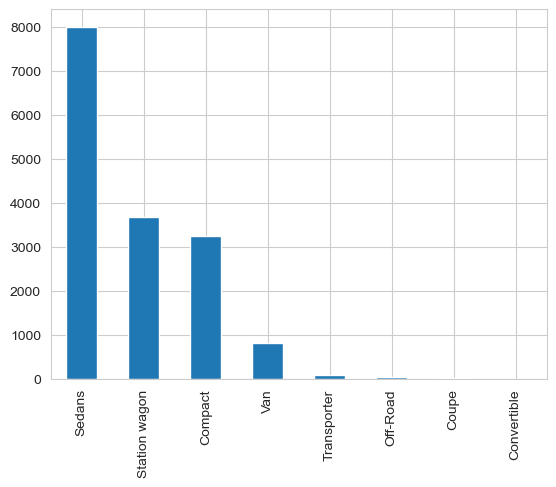

In [379]:
oto1.body_type.value_counts(dropna = False).plot(kind = "bar")

### ``"cylinders"``

In [380]:
oto1.cylinders.value_counts(dropna=False)

4.00    8105
NaN     5680
3.00    2104
5.00      22
6.00       3
8.00       2
2.00       2
1.00       1
Name: cylinders, dtype: int64

<AxesSubplot:xlabel='make_model'>

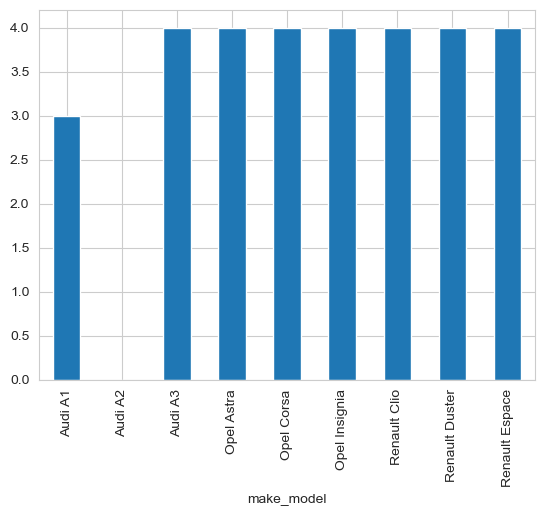

In [381]:
oto1.groupby('make_model')['cylinders'].median().plot(kind = "bar")

In [382]:
oto1.groupby('make_model')['cylinders'].transform('median')

0       3.00
1       3.00
2       3.00
3       3.00
4       3.00
        ... 
15914   4.00
15915   4.00
15916   4.00
15917   4.00
15918   4.00
Name: cylinders, Length: 15919, dtype: float64

In [383]:
test1 = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].transform('median'))
test2 = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].median())

In [384]:
test1.value_counts(dropna = False)

4.00    12925
3.00     2963
5.00       22
6.00        3
8.00        2
2.00        2
NaN         1
1.00        1
Name: cylinders, dtype: int64

In [385]:
test2.value_counts(dropna = False)

4.00    8105
NaN     5680
3.00    2104
5.00      22
6.00       3
8.00       2
2.00       2
1.00       1
Name: cylinders, dtype: int64

In [386]:
oto1['cylinders'] = oto1['cylinders'].fillna(oto1.groupby('make_model')['cylinders'].transform('median'))

In [387]:
oto1.cylinders.value_counts(dropna=False)

4.00    12925
3.00     2963
5.00       22
6.00        3
8.00        2
2.00        2
NaN         1
1.00        1
Name: cylinders, dtype: int64

In [388]:
oto1.cylinders.fillna(3, inplace=True)

In [389]:
oto1.cylinders.value_counts(dropna=False)

4.00    12925
3.00     2964
5.00       22
6.00        3
8.00        2
2.00        2
1.00        1
Name: cylinders, dtype: int64

In [390]:
oto1.drop("cylinders", axis = 1, inplace = True)

### ``"gears"``

In [391]:
oto1.gears.value_counts(dropna = False)

6.00    5822
NaN     4712
5.00    3240
7.00    1908
8.00     224
9.00       6
1.00       2
3.00       2
4.00       2
2.00       1
Name: gears, dtype: int64

In [392]:
oto1["gears"] = oto1["gears"].fillna(oto1.groupby("make_model")["gears"].transform("median"))

In [393]:
oto1.gears.value_counts(dropna = False)

6.00    9361
5.00    4412
7.00    1908
8.00     224
9.00       6
1.00       2
3.00       2
4.00       2
NaN        1
2.00       1
Name: gears, dtype: int64

In [394]:
oto1.groupby("make_model")["gears"].median()

make_model
Audi A1          6.00
Audi A2           NaN
Audi A3          6.00
Opel Astra       6.00
Opel Corsa       5.00
Opel Insignia    6.00
Renault Clio     5.00
Renault Duster   6.00
Renault Espace   6.00
Name: gears, dtype: float64

In [395]:
oto1.gears.fillna(5, inplace = True)

In [396]:
oto1.gears.value_counts(dropna = False)

6.00    9361
5.00    4413
7.00    1908
8.00     224
9.00       6
1.00       2
3.00       2
4.00       2
2.00       1
Name: gears, dtype: int64

In [397]:
oto1[oto1["gears"] == 4]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15822,Renault Espace,Van,50950,VAT deductible,11.00,New,Cloth,4.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,NaN,165
15823,Renault Espace,Van,50950,VAT deductible,11.00,New,Cloth,4.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,NaN,165


In [398]:
oto1.gears.iloc[15822] = 7
oto1.gears.iloc[15823] = 7

In [399]:
oto1[oto1["gears"] == 3]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15817,Renault Espace,Van,54204,VAT deductible,11.00,New,Part leather,3.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.40,Automatic,NaN,White,116.00,1997.00,NaN,1.00,Diesel,5.00,NaN,146
15845,Renault Espace,Van,46660,VAT deductible,11.00,New,Part leather,3.00,1,0,NaN,NaN,Netherlands,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.10,Automatic,NaN,White,116.00,1997.00,NaN,1.00,Diesel,5.00,NaN,118


In [400]:
oto1.gears.iloc[15817] = 7
oto1.gears.iloc[15845] = 7

In [401]:
oto1[oto1["gears"] == 1]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
8921,Opel Corsa,Compact,11000,VAT deductible,24000.00,Used,"Cloth, Black",1.00,1,0,NaN,Metallic,Belgium,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,4.80,Semi-automatic,front,Blue,112.00,1398.00,Euro 6,2.00,Benzine,5.00,5.00,66
14375,Renault Clio,Compact,23990,NaN,10.00,Demonstration,NaN,1.00,1,0,NaN,NaN,Austria,NaN,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,NaN,Automatic,NaN,White,116.00,1618.00,NaN,2.00,Benzine,4.00,NaN,147


In [402]:
oto1.gears.iloc[8921] = 5
oto1.gears.iloc[14375] = 6

In [403]:
oto1[oto1['gears'] == 2]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
9812,Opel Corsa,Sedans,9880,VAT deductible,19247.00,Used,"Cloth, Black",2.00,1,0,NaN,Metallic,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,NaN,Manual,NaN,Grey,116.00,1229.00,Euro 6,2.00,Benzine,5.00,NaN,51


In [404]:
oto1.gears.iloc[9812] = 5

In [405]:
oto1[oto1['gears'] == 9]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15812,Renault Espace,Van,54982,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,White,116.00,1798.00,NaN,1.00,Benzine,5.00,NaN,165
15814,Renault Espace,Van,54982,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.60,Automatic,NaN,White,116.00,1798.00,NaN,1.00,Benzine,5.00,NaN,165
15824,Renault Espace,Van,52711,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.40,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,NaN,165
15827,Renault Espace,Van,52711,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,Metallic,Netherlands,NaN,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.40,Automatic,NaN,Grey,116.00,1798.00,NaN,1.00,Benzine,5.00,NaN,165
15869,Renault Espace,Van,49100,VAT deductible,11.00,New,Part leather,9.00,1,0,NaN,NaN,Netherlands,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.30,Automatic,NaN,White,116.00,1997.00,

In [406]:
indx_list = list(oto1[oto1["gears"] == 9].index)

In [407]:
indx_list

[15812, 15814, 15824, 15827, 15869, 15876]

In [408]:
for indx in indx_list:
    oto1.gears.iloc[indx] = 7

<AxesSubplot:>

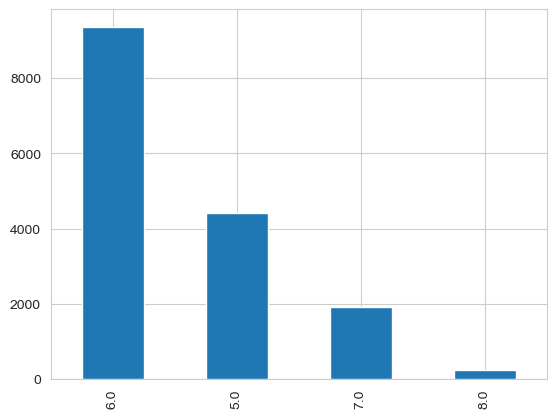

In [409]:
oto1.gears.value_counts(dropna = False).plot(kind = "bar")

In [410]:
oto1.type.value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [411]:
oto1.iloc[list(oto1.loc[oto1.type.isnull(), 'type'].index)]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,next_inspection,paint_type,country,emission_label,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,emission_class,register_age,fuel_new,nr_doors,nr_seats,hp_kw
2765,Audi A3,Sedans,17900,NaN,115137.00,NaN,"Cloth, Other",6.00,2,0,NaN,NaN,NaN,1 (No sticker),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,4.50,Automatic,front,White,118.00,1968.00,Euro 6,4.00,Diesel,5.00,5.00,110
5237,Audi A3,Sedans,25400,NaN,NaN,NaN,"Cloth, Other",7.00,1,0,NaN,NaN,NaN,1 (No sticker),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,3.90,Automatic,front,Grey,103.00,1598.00,Euro 6,NaN,Diesel,5.00,5.00,85


In [412]:
oto1.type.fillna("Used", inplace = True)

<AxesSubplot:>

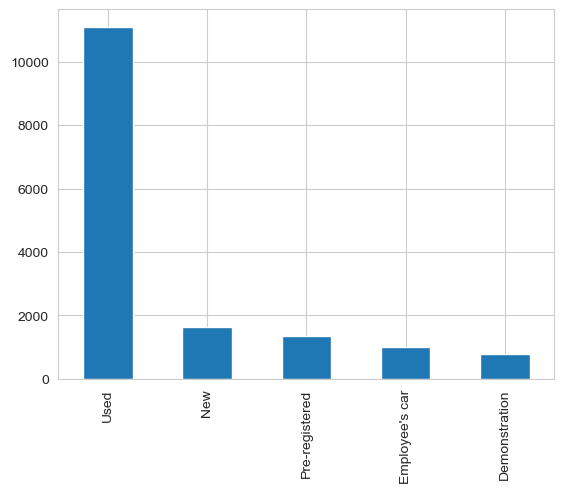

In [413]:
oto1.type.value_counts(dropna = False).plot(kind = "bar")

In [414]:
oto1.upholstery.value_counts(dropna = False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Velour, Black            36
Full leather, Beige      36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

In [415]:
oto1["upholstery"].str.contains("leather|alcantara", case = False, regex = True).value_counts(dropna = False)

False    9634
NaN      3720
True     2565
Name: upholstery, dtype: int64

In [416]:
oto1["upholstery"].str.contains("leather|alcantara", case = False, regex = True).value_counts().sum()

12199

In [417]:
9634 / 12199  

0.7897368636773506

In [418]:
3720 * 0.7897368636773506

2937.8211328797443

In [419]:
oto1.upholstery.fillna("Cloth", limit = 1000, inplace = True)
oto1.upholstery.fillna("Leather", limit = 410, inplace = True)
oto1.upholstery.fillna("Cloth", limit = 1000, inplace = True)
oto1.upholstery.fillna("Leather", limit = 410, inplace = True)
oto1.upholstery.fillna("Cloth", limit = 900, inplace = True)

In [420]:
upholstery_bool_list = oto1['upholstery'].str.contains('leather|alcantara', case = False, regex = True)

In [421]:
oto1.loc[upholstery_bool_list, "upholstery"] = "Part/Full Leather"

In [422]:
oto1.upholstery.loc[lambda x : x!= "Part/Full Leather"] = "Cloth"

<AxesSubplot:>

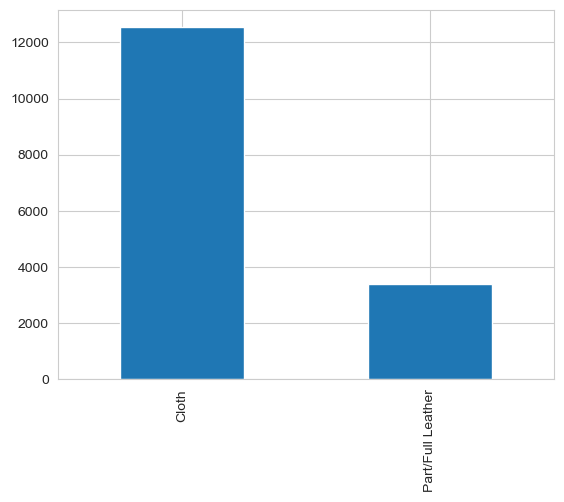

In [423]:
oto1.upholstery.value_counts(dropna = False).plot(kind = "bar")

In [424]:
oto1.register_age.value_counts(dropna = False)

2.00    4522
4.00    3674
3.00    3273
1.00    2853
NaN     1597
Name: register_age, dtype: int64

In [425]:
oto1[oto1.register_age.isnull()]["km"].value_counts(dropna = False)

NaN         838
10.00       369
1.00        146
5.00         58
20.00        32
15.00        21
0.00         19
11.00        12
8.00         11
50.00        10
12.00         8
100.00        8
7.00          7
3.00          4
9.00          4
4.00          3
250.00        3
25.00         3
30.00         3
3000.00       2
39962.00      2
2.00          2
22627.00      2
784.00        1
89692.00      1
3500.00       1
325.00        1
497.00        1
99.00         1
77.00         1
40.00         1
19500.00      1
6100.00       1
11000.00      1
89982.00      1
4307.00       1
141.00        1
34164.00      1
500.00        1
150.00        1
11200.00      1
20768.00      1
32084.00      1
142.00        1
81800.00      1
281.00        1
6.00          1
68485.00      1
85000.00      1
196.00        1
4500.00       1
60.00         1
5000.00       1
Name: km, dtype: int64

In [426]:
oto1[oto1.register_age.isnull()]["km"].mean()

934.4967061923584

In [427]:
oto1[oto1.register_age.isnull()]["km"].median()

10.0

In [428]:
oto1.register_age.fillna(0, inplace = True)

<AxesSubplot:>

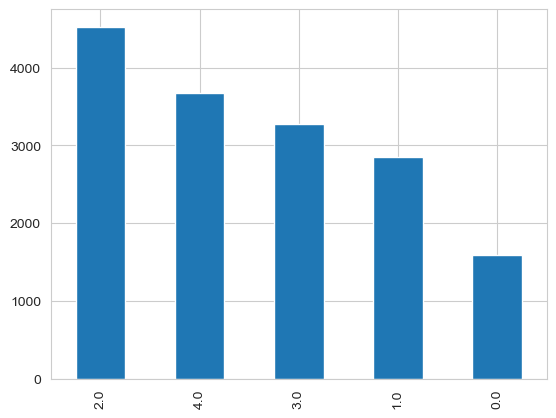

In [429]:
oto1.register_age.value_counts(dropna = False).plot(kind = "bar")

In [430]:
oto1.km.value_counts(dropna = False)

10.00       1045
NaN         1024
1.00         367
5.00         170
50.00        148
            ... 
67469.00       1
43197.00       1
10027.00       1
35882.00       1
57.00          1
Name: km, Length: 6690, dtype: int64

In [431]:
oto1.groupby("register_age")["km"].transform("mean")

0       77442.52
1       41754.94
2       77442.52
3       77442.52
4       77442.52
          ...   
15914     934.50
15915    2085.36
15916    2085.36
15917    2085.36
15918    2085.36
Name: km, Length: 15919, dtype: float64

In [432]:
oto1['km'] = oto1['km'].fillna(oto1.groupby('register_age')['km'].transform('mean'))

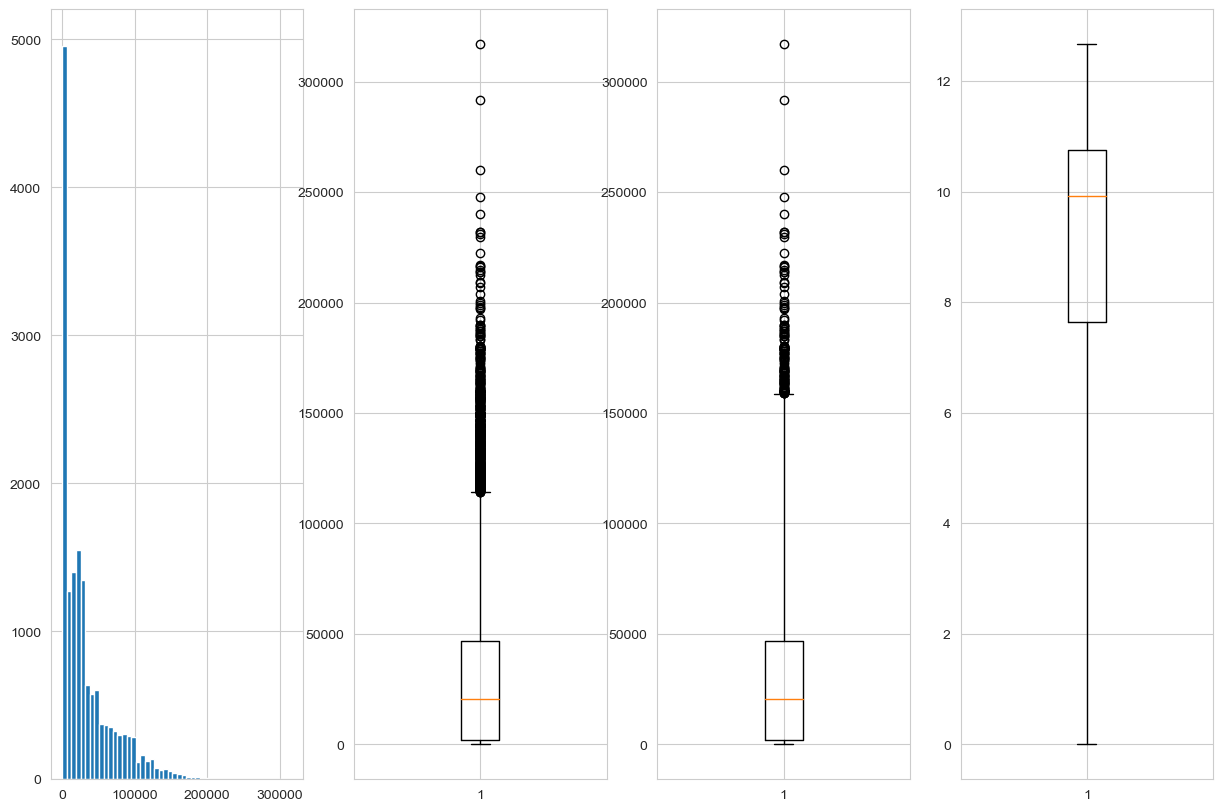

In [433]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(oto1.km, bins = 50)

plt.subplot(142)
plt.boxplot(oto1.km)

plt.subplot(143)
plt.boxplot(oto1.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(oto1.km), whis = 2.5)
plt.show()

In [434]:
oto1.km.sort_values(ascending = False).head()

9279    317000.00
3003    291800.00
5712    260000.00
6224    248000.00
15277   240000.00
Name: km, dtype: float64

In [435]:
oto1.vat.value_counts(dropna = False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [436]:
oto1.vat.fillna(method = "ffill", inplace = True)

<AxesSubplot:>

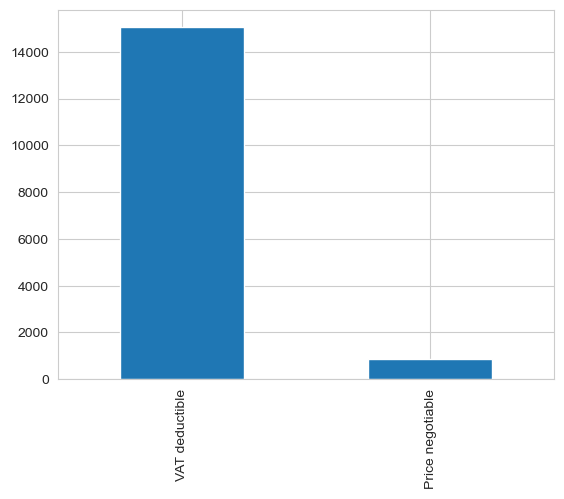

In [437]:
oto1.vat.value_counts(dropna = False).plot(kind = "bar")

In [438]:
oto1.next_inspection.value_counts(dropna = False)

NaN           12384
2021-06-01      471
2021-03-01      210
2021-05-01      180
2021-04-01      171
              ...  
2014-05-01        1
2016-04-01        1
1955-01-01        1
2018-01-01        1
2022-11-01        1
Name: next_inspection, Length: 78, dtype: int64

In [439]:
oto1.drop("next_inspection", axis = 1, inplace = True)

In [440]:
oto1.paint_type.value_counts(dropna = False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [441]:
oto1.drop("paint_type", axis = 1, inplace = True)

In [442]:
oto1.country.value_counts(dropna = False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country, dtype: int64

In [443]:
oto1.drop("country", axis = 1, inplace = True)

In [444]:
oto1.emission_label.value_counts(dropna = False)

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

In [445]:
oto1.drop("emission_label", axis = 1, inplace = True)

In [446]:
oto1.consumption_comb.value_counts(dropna = False)

NaN     1925
5.40     770
3.90     733
4.00     717
5.10     657
        ... 
8.10       2
9.10       1
7.50       1
1.20       1
4.55       1
Name: consumption_comb, Length: 65, dtype: int64

In [447]:
oto1.consumption_comb.sort_values().head(55).unique()

array([0. , 1. , 1.2, 1.6, 3. ])

In [448]:
oto1.consumption_comb.sort_values().tail(55).unique()

array([nan])

In [449]:
consumption_outlier = oto1.consumption_comb.isin([0.00, 1.00, 1.20, 1.60])

In [450]:
consumption_outlier.value_counts()

False    15876
True        43
Name: consumption_comb, dtype: int64

In [451]:
oto1.loc[consumption_outlier, "consumption_comb"] = np.nan

In [452]:
oto1.groupby("make_model")["consumption_comb"].mean()

make_model
Audi A1          4.37
Audi A2          4.90
Audi A3          4.33
Opel Astra       4.71
Opel Corsa       5.50
Opel Insignia    5.38
Renault Clio     4.71
Renault Duster    NaN
Renault Espace   5.40
Name: consumption_comb, dtype: float64

In [453]:
oto1.groupby("make_model")["consumption_comb"].median()

make_model
Audi A1          4.40
Audi A2          4.90
Audi A3          4.10
Opel Astra       4.60
Opel Corsa       5.40
Opel Insignia    5.50
Renault Clio     5.00
Renault Duster    NaN
Renault Espace   4.70
Name: consumption_comb, dtype: float64

In [454]:
oto1[oto1["make_model"] == "Renault Duster"].shape[0]

34

In [455]:
oto1["consumption_comb"] = oto1["consumption_comb"].fillna(oto1.groupby("make_model")["consumption_comb"].transform("mean"))

In [456]:
oto1.consumption_comb.isnull().sum()

34

In [457]:
oto1["consumption_comb"].mean()

4.843707403948368

In [458]:
oto1["consumption_comb"] = oto1["consumption_comb"].fillna(oto1["consumption_comb"].mean())

In [459]:
oto1.consumption_comb.isnull().sum()

0

In [460]:
oto1.consumption_comb.sort_values().tail(44)

8319    7.80
8326    7.80
11432   7.80
8268    7.80
8321    7.80
8270    7.80
11219   7.90
12620   7.90
11221   7.90
10548   8.00
10571   8.00
12654   8.00
10744   8.00
10507   8.00
3609    8.10
3608    8.10
10515   8.30
3600    8.30
3599    8.30
3598    8.30
5161    8.30
3590    8.30
3587    8.30
3601    8.30
3596    8.30
3604    8.30
3603    8.30
3592    8.30
3649    8.30
3605    8.30
3606    8.30
3610    8.30
3593    8.30
3648    8.30
3602    8.30
3595    8.30
12422   8.60
12530   8.60
12553   8.60
10789   8.60
10817   8.70
12529   8.70
12054   8.70
10771   9.10
Name: consumption_comb, dtype: float64

In [461]:
oto1.consumption_comb.describe()

count   15919.00
mean        4.84
std         0.86
min         3.00
25%         4.20
50%         4.80
75%         5.40
max         9.10
Name: consumption_comb, dtype: float64

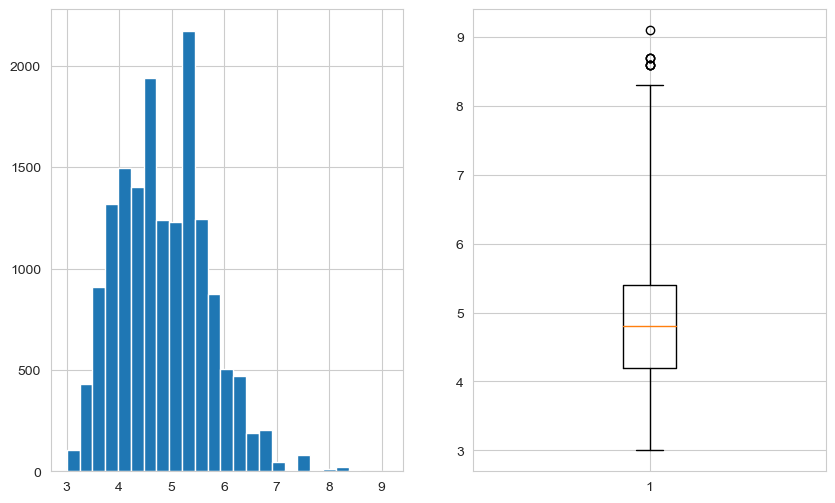

In [462]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(oto1.consumption_comb, bins = 25)

plt.subplot(122)
plt.boxplot(oto1.consumption_comb, whis = 2.5)

plt.show()

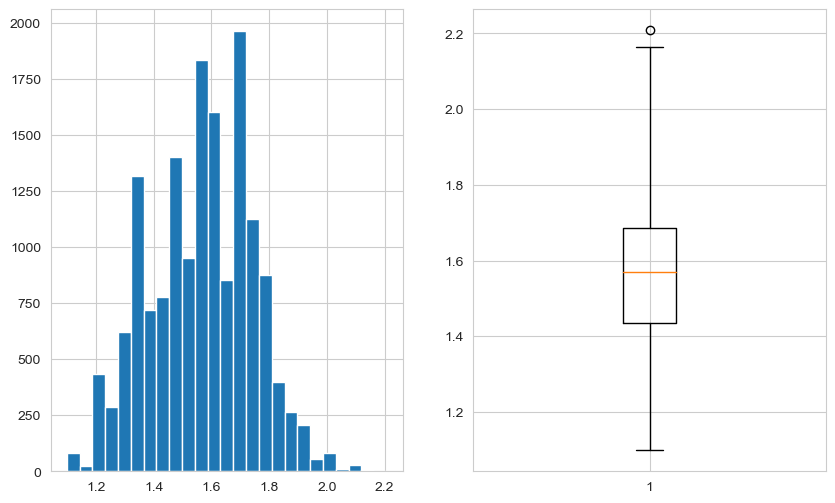

In [463]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(oto1.consumption_comb), bins=25)

plt.subplot(122)
plt.boxplot(np.log(oto1.consumption_comb), whis = 2)

plt.show()

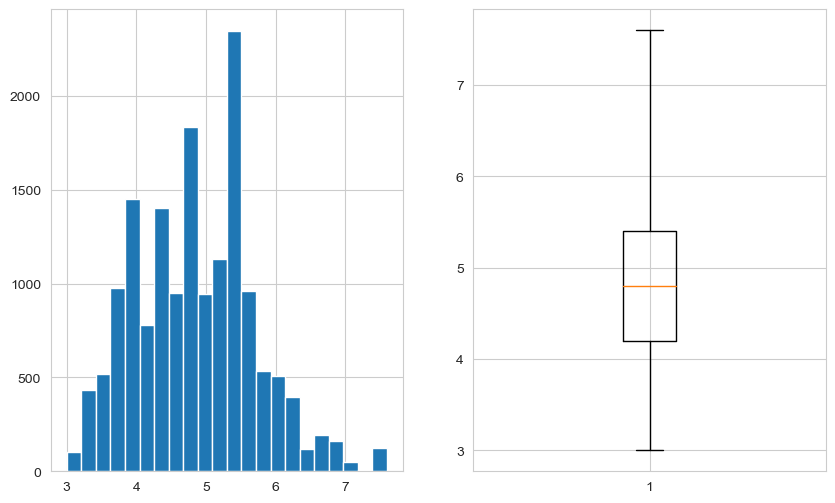

In [464]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(winsorize(oto1.consumption_comb, (0.003)), bins=22)

plt.subplot(122)
plt.boxplot(winsorize(oto1.consumption_comb, (0.003)), whis = 2)

plt.show()

In [465]:
oto1.drive_chain.value_counts(dropna = False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [466]:
fill_most("make_model", "drive_chain")

<AxesSubplot:>

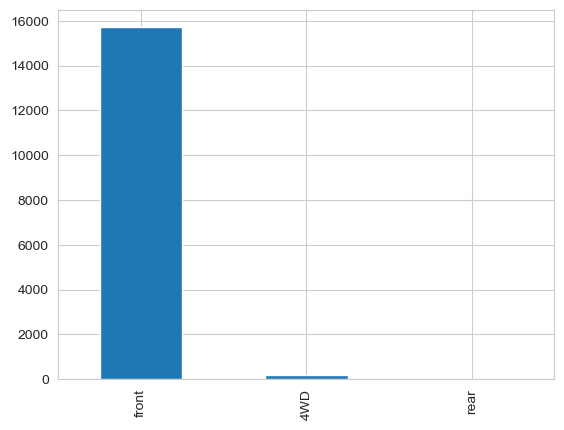

In [467]:
oto1.drive_chain.value_counts(dropna=False).plot(kind = "bar")

In [468]:
oto1.displacement_cc.value_counts(dropna = False)

1598.00    4761
999.00     2438
1398.00    1314
1399.00     749
1229.00     677
           ... 
122.00        1
1198.00       1
1195.00       1
2967.00       1
1800.00       1
Name: displacement_cc, Length: 78, dtype: int64

In [469]:
oto1.displacement_cc.isin([np.nan]).value_counts(dropna = False)

False    15423
True       496
Name: displacement_cc, dtype: int64

In [470]:
fill_most("make_model", "displacement_cc")

In [471]:
oto1.displacement_cc.isnull().sum()

0

In [472]:
oto1.displacement_cc.describe()

count   15919.00
mean     1426.17
std       329.68
min         1.00
25%      1229.00
50%      1461.00
75%      1598.00
max     16000.00
Name: displacement_cc, dtype: float64

In [473]:
oto1.sort_values(by = ["displacement_cc"], ascending = False)["displacement_cc"].head(45)

10932   16000.00
7169    15898.00
10771    2967.00
3592     2480.00
3609     2480.00
3608     2480.00
3606     2480.00
3605     2480.00
3603     2480.00
3648     2480.00
3602     2480.00
3601     2480.00
3610     2480.00
3604     2480.00
3649     2480.00
3590     2480.00
3600     2480.00
3599     2480.00
3598     2480.00
3593     2480.00
3595     2480.00
3587     2480.00
3596     2480.00
11978    2000.00
11988    2000.00
2903     2000.00
12520    2000.00
12519    2000.00
12503    2000.00
12181    2000.00
12938    2000.00
12414    2000.00
12518    2000.00
11977    2000.00
11800    2000.00
12226    2000.00
12945    2000.00
12179    2000.00
12170    2000.00
12521    2000.00
11234    2000.00
10556    2000.00
13027    2000.00
13029    2000.00
13050    2000.00
Name: displacement_cc, dtype: float64

In [474]:
oto1.sort_values(by=['displacement_cc'])["displacement_cc"].head(55) 

14315     1.00
12800     1.00
12798     1.00
12796     1.00
12484     1.00
12790     1.00
12786     1.00
12783     1.00
14327     1.00
12781     1.00
14326     1.00
14325     1.00
12769     1.00
12815     1.00
14324     1.00
12768     1.00
12750     1.00
14322     1.00
14321     1.00
12670     1.00
12604     1.00
14320     1.00
12467     1.00
12473     1.00
12554     1.00
12501     1.00
12499     1.00
14319     1.00
12823     1.00
14328     1.00
12849     1.00
13904     1.00
12848     1.00
12835     1.00
14314     1.00
14284     1.00
14198     2.00
10559     2.00
13912    54.00
10194   122.00
7812    139.00
7811    139.00
7810    139.00
7809    139.00
8128    140.00
15578   160.00
15579   160.00
15574   160.00
15575   160.00
15576   160.00
15577   160.00
13653   890.00
14702   898.00
14726   898.00
14703   898.00
Name: displacement_cc, dtype: float64

In [475]:
outlier_bool_list = oto1.displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [476]:
oto1.loc[outlier_bool_list, "displacement_cc"] = np.nan

In [477]:
fill_most("make_model", "displacement_cc")

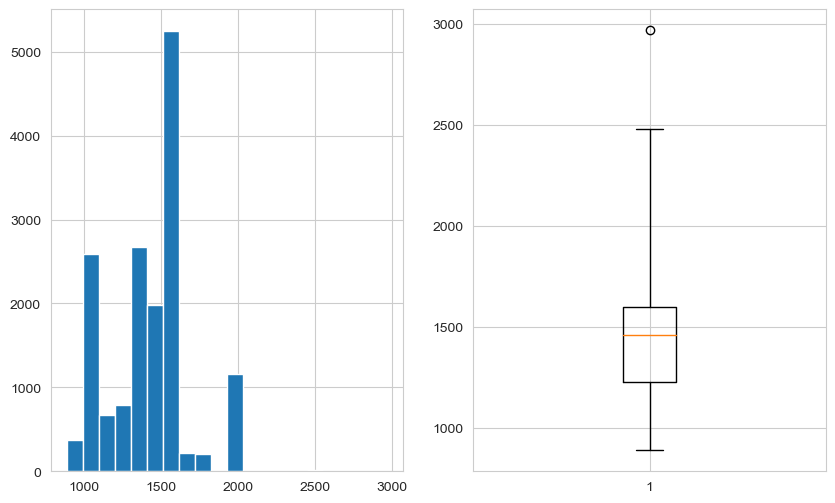

In [478]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(oto1.displacement_cc, bins = 20)

plt.subplot(122)
plt.boxplot(oto1.displacement_cc, whis = 2.5)

plt.show()

In [479]:
oto1.emission_class.value_counts(dropna = False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class, dtype: int64

In [480]:
oto1.drop("emission_class", axis = 1, inplace = True)

In [481]:
oto1.nr_doors.value_counts(dropna = False)

5.00    11575
4.00     3079
3.00      832
2.00      219
NaN       212
1.00        1
7.00        1
Name: nr_doors, dtype: int64

In [482]:
fill_most("make_model", "nr_doors")

In [483]:
oto1.nr_doors.value_counts(dropna = False)

5.00    11787
4.00     3079
3.00      832
2.00      219
1.00        1
7.00        1
Name: nr_doors, dtype: int64

In [484]:
oto1[oto1['nr_doors'] == 7.0]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw
15202,Renault Espace,Van,21600,Price negotiable,78000.00,Used,Part/Full Leather,6.00,1,0,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,0,1,4.60,Automatic,front,Brown,120.00,1598.00,4.00,Diesel,7.00,NaN,118


In [485]:
oto1.nr_doors.iloc[15202] = 5

In [486]:
oto1[oto1['nr_doors']==1.0]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw
13782,Renault Clio,Compact,8500,VAT deductible,41493.00,Used,Cloth,5.00,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,4.71,Manual,front,White,116.00,1461.00,4.00,Diesel,1.00,NaN,55


In [487]:
oto1.nr_doors.iloc[13782] = 5

<AxesSubplot:>

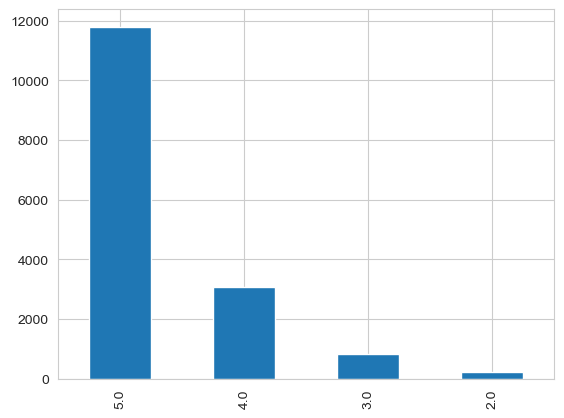

In [488]:
oto1.nr_doors.value_counts(dropna = False).plot(kind = "bar")

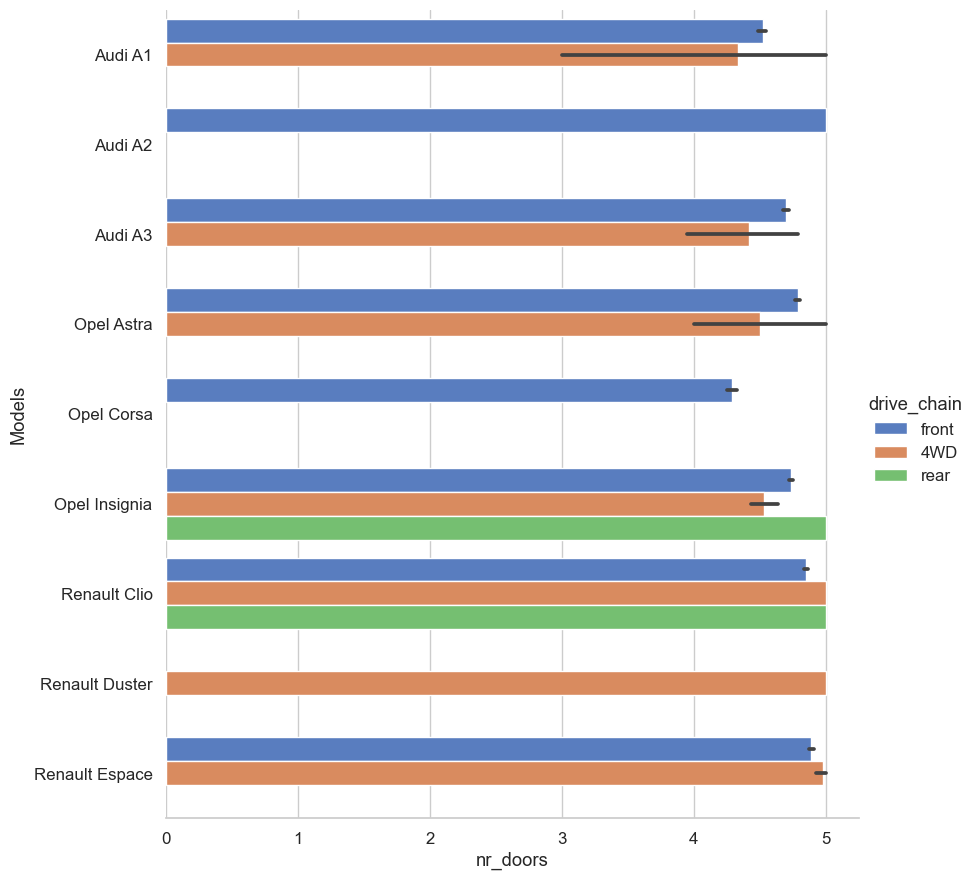

In [489]:
sns.set(style = "whitegrid", font_scale = 1.1)

g = sns.catplot(x = "nr_doors", y = "make_model", hue = "drive_chain", data = oto1,
               height = 9, kind = "bar", palette = "muted")

g.despine(left = True)
g.set_ylabels("Models")

In [490]:
oto1.nr_seats.value_counts(dropna = False)

5.00    13336
4.00     1125
NaN       977
7.00      362
2.00      116
6.00        2
3.00        1
Name: nr_seats, dtype: int64

In [491]:
fill_most("make_model", "nr_seats")

In [492]:
oto1.nr_seats.value_counts(dropna=False)

5.00    14313
4.00     1125
7.00      362
2.00      116
6.00        2
3.00        1
Name: nr_seats, dtype: int64

In [493]:
oto1[oto1['nr_seats'] == 6.0]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw
582,Audi A1,Compact,13500,VAT deductible,100000.00,Used,Cloth,5.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.37,Manual,front,White,116.00,1000.00,3.00,Benzine,5.00,6.00,70
15890,Renault Espace,Station wagon,42490,VAT deductible,934.50,New,Cloth,6.00,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0,5.70,Automatic,front,Black,168.00,1997.00,0.00,Diesel,5.00,6.00,147


In [494]:
oto1.nr_seats.iloc[582] = 5
oto1.nr_seats.iloc[15890] = 5

In [495]:
oto1[oto1['nr_seats'] == 3.0]

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,co2_emission,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw
1636,Audi A1,Compact,23090,VAT deductible,9821.00,Used,Part/Full Leather,7.00,1,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.80,Automatic,front,Black,134.00,1798.00,2.00,Benzine,2.00,3.00,141


In [496]:
oto1.nr_seats.iloc[1636] = 5

<AxesSubplot:>

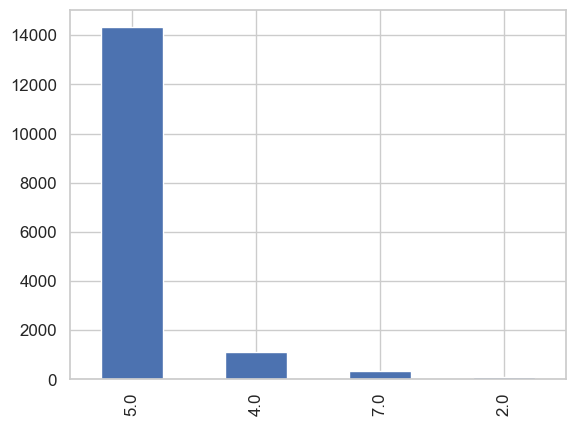

In [497]:
oto1.nr_seats.value_counts(dropna = False).plot(kind = "bar")

In [498]:
oto1.fuel_new.value_counts(dropna = False)

Benzine    8550
Diesel     7299
LPG/CNG      70
Name: fuel_new, dtype: int64

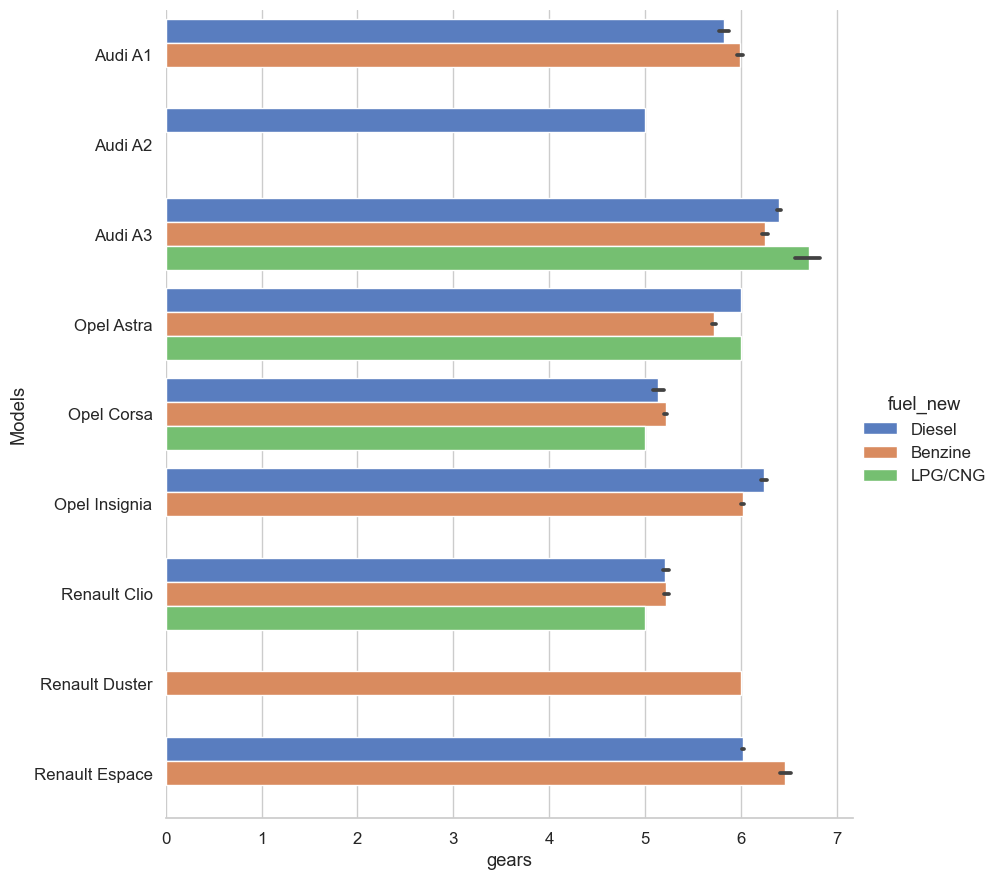

In [499]:
sns.set(style="whitegrid", font_scale = 1.1)

g = sns.catplot(x="gears", y="make_model", hue="fuel_new", data=oto1,
                height=9, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Models")

In [500]:
oto1.isnull().sum()*100/oto1.shape[0]

make_model     0.00
body_type      0.00
price          0.00
vat            0.00
km             0.00
               ... 
register_age   0.00
fuel_new       0.00
nr_doors       0.00
nr_seats       0.00
hp_kw          0.00
Length: 115, dtype: float64

In [501]:
miss_val = []

[miss_val.append(i) for i in oto1.columns if any(oto1[i].isnull())]

miss_val

[]

In [502]:
oto1.corr()

,price,km,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,co2_emission,displacement_cc,register_age,nr_doors,nr_seats,hp_kw
price,1.00,-0.40,0.54,-0.15,0.01,0.08,0.06,0.30,0.42,0.05,0.13,-0.01,0.28,0.01,0.26,0.12,0.33,0.15,0.02,0.27,0.03,0.23,0.31,0.22,0.28,0.14,0.34,0.24,0.38,0.33,0.28,0.34,0.31,-0.02,0.36,0.30,0.19,0.00,0.23,0.16,0.03,0.01,0.01,0.03,-0.08,0.25,0.08,-0.02,-0.08,0.01,0.15,0.03,-0.05,0.20,0.01,0.04,0.01,-0.01,0.04,0.14,0.03,0.02,0.11,0.13,0.16,0.13,0.02,0.02,0.14,-0.02,-0.04,0.25,0.22,0.05,0.38,-0.05,-0.07,0.00,0.09,0.01,0.01,0.34,0.06,-0.05,-0.04,0.06,-0.04,0.12,0.44,0.37,0.07,-0.00,-0.05,0.00,-0.01,0.02,0.06,0.35,0.18,0.29,0.02,0.28,-0.47,0.16,0.25,0.67
km,-0.40,1.00,-0.01,0.14,-0.05,0.01,0.03,0.04,0.02,0.06,0.02,0.02,0.01,-0.06,0.13,-0.07,-0.04,-0.11,-0.09,-0.05,0.03,-0.06,-0.11,0.04,-0.04,-0.04,0.06,0.04,-0.09,-0.07,-0.03,-0.02,-0.06,-0.00,-0.09,-0.08,0.06,0.12,-0.02,0.05,0.06,0.03,0.01,-0.03,0.14,-0.05,-0.09,-0.04,0.08,-0.00,0.02,0.03,-0.05,-0.08,-0.02,-0.08,0.02,0.01,0.16,-0.02,0.02,-0.00,0.06,0.01,-0.01,-0.07,0.18,-0.00,-0.01,0.07,0.00,0.04,0.02,0.12,-0.01,-0.02,0.09,-0.08,0.05,-0.03,-0.10,-0.10,-0.01,0.05,0.11,-0.04,-0.03,-0.04,-0.10,-0.06,0.03,-0.03,-0.02,0.10,-0.04,-0.04,-0.01,-0.03,0.04,-0.30,-0.01,0.31,0.73,0.01,-0.01,0.00
gears,0.54,-0.01,1.00,-0.03,-0.02,0.09,0.03,0.32,0.38,0.06,0.07,0.00,0.16,-0.08,0.17,0.02,0.12,0.06,-0.01,0.12,0.02,0.16,0.22,0.17,0.10,0.14,0.28,0.08,0.31,0.14,0.12,0.25,0.27,-0.03,0.25,0.16,0.15,0.08,0.19,0.07,0.03,0.03,0.01,0.06,0.04,0.08,0.05,0.02,-0.02,0.06,0.10,0.01,-0.04,0.12,0.03,0.01,0.03,0.00,0.10,0.12,0.04,0.01,0.12,0.13,0.15,0.03,0.06,0.01,0.15,0.02,-0.05,0.19,0.17,0.11,0.15,-0.03,0.02,-0.08,0.11,-0.01,-0.07,0.18,0.09,0.01,0.05,0.02,-0.03,0.08,0.22,0.22,0.03,-0.03,0.01,0.07,-0.02,-0.00,0.07,0.16,0.30,-0.04,0.01,0.37,-0.05,0.14,0.09,0.47
previous_owner,-0.15,0.14,-0.03,1.00,0.02,-0.01,0.00,0.02,-0.01,-0.01,-0.04,-0.00,-0.02,0.03,-0.01,-0.01,-0.02,-0.00,0.05,0.05,0.02,0.01,0.00,0.06,-0.01,-0.02,-0.01,0.03,-0.06,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,0.02,-0.01,-0.02,-0.03,

In [503]:
numeric_col = "price,km,gears,co2_emission,previous_owner,consumption_comb,displacement_cc,register_age,hp_kw".split(",")

In [504]:
oto_corr = oto1[numeric_col]

In [506]:
oto_corr

,price,km,gears,co2_emission,previous_owner,consumption_comb,displacement_cc,register_age,hp_kw
0,15770,56013.00,6.00,99.00,2,3.80,1422.00,4.00,66
1,14500,80000.00,7.00,129.00,1,5.60,1798.00,3.00,141
2,14640,83450.00,6.00,99.00,1,3.80,1598.00,4.00,85
3,14500,73000.00,6.00,99.00,1,3.80,1422.00,4.00,66
4,16790,16200.00,6.00,109.00,1,4.10,1422.00,4.00,66
...,...,...,...,...,...,...,...,...,...
15914,39950,934.50,6.00,139.00,1,5.30,1997.00,0.00,147
15915,39885,9900.00,7.00,168.00,1,7.40,1798.00,1.00,165
15916,39875,15.00,6.00,139.00,1,5.30,1997.00,1.00,146
15917,39700,10.00,6.00,139.00,1,5.30,1997.00,1.00,147


<AxesSubplot:>

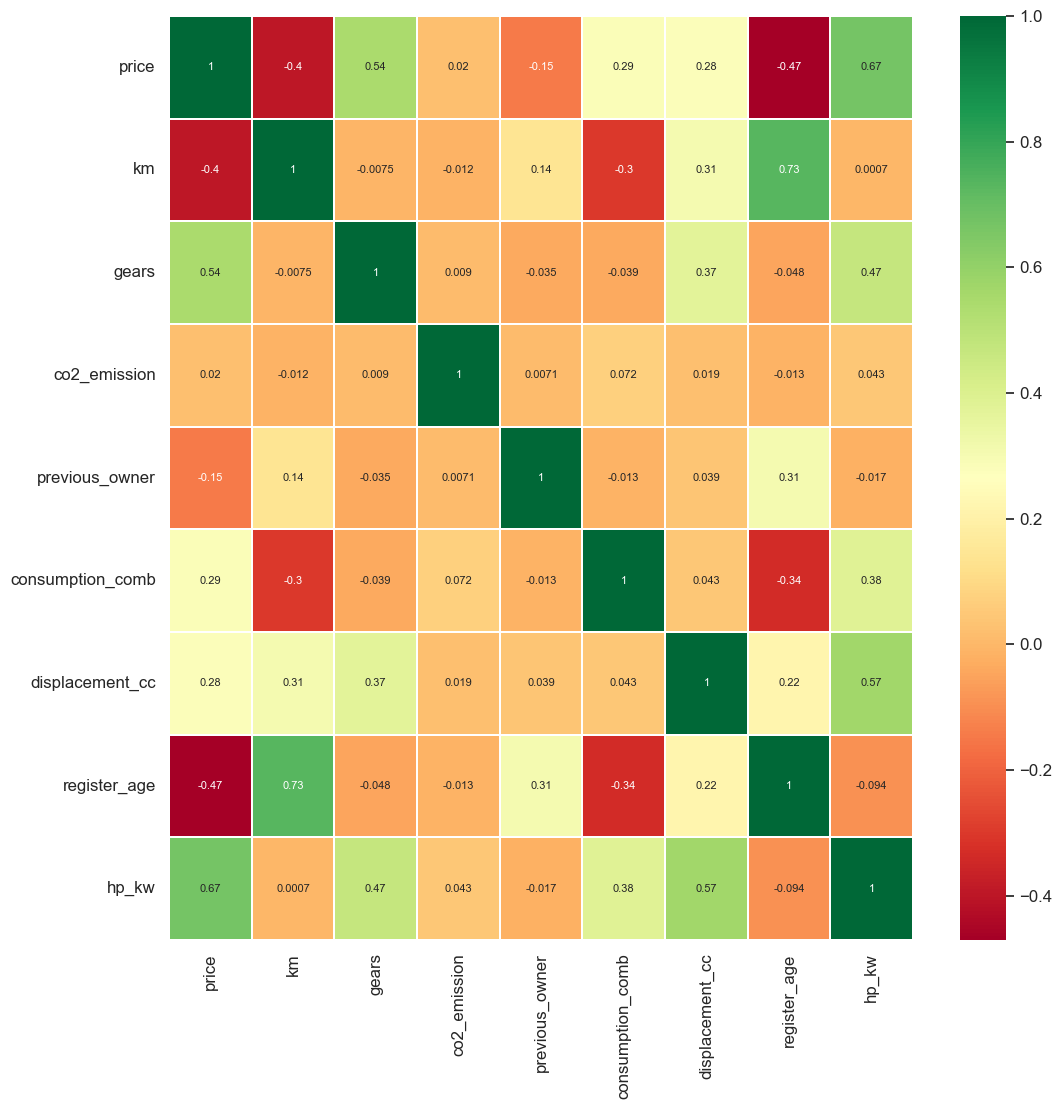

In [507]:
plt.figure(figsize = (12,12))
sns.heatmap(oto_corr.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 8})

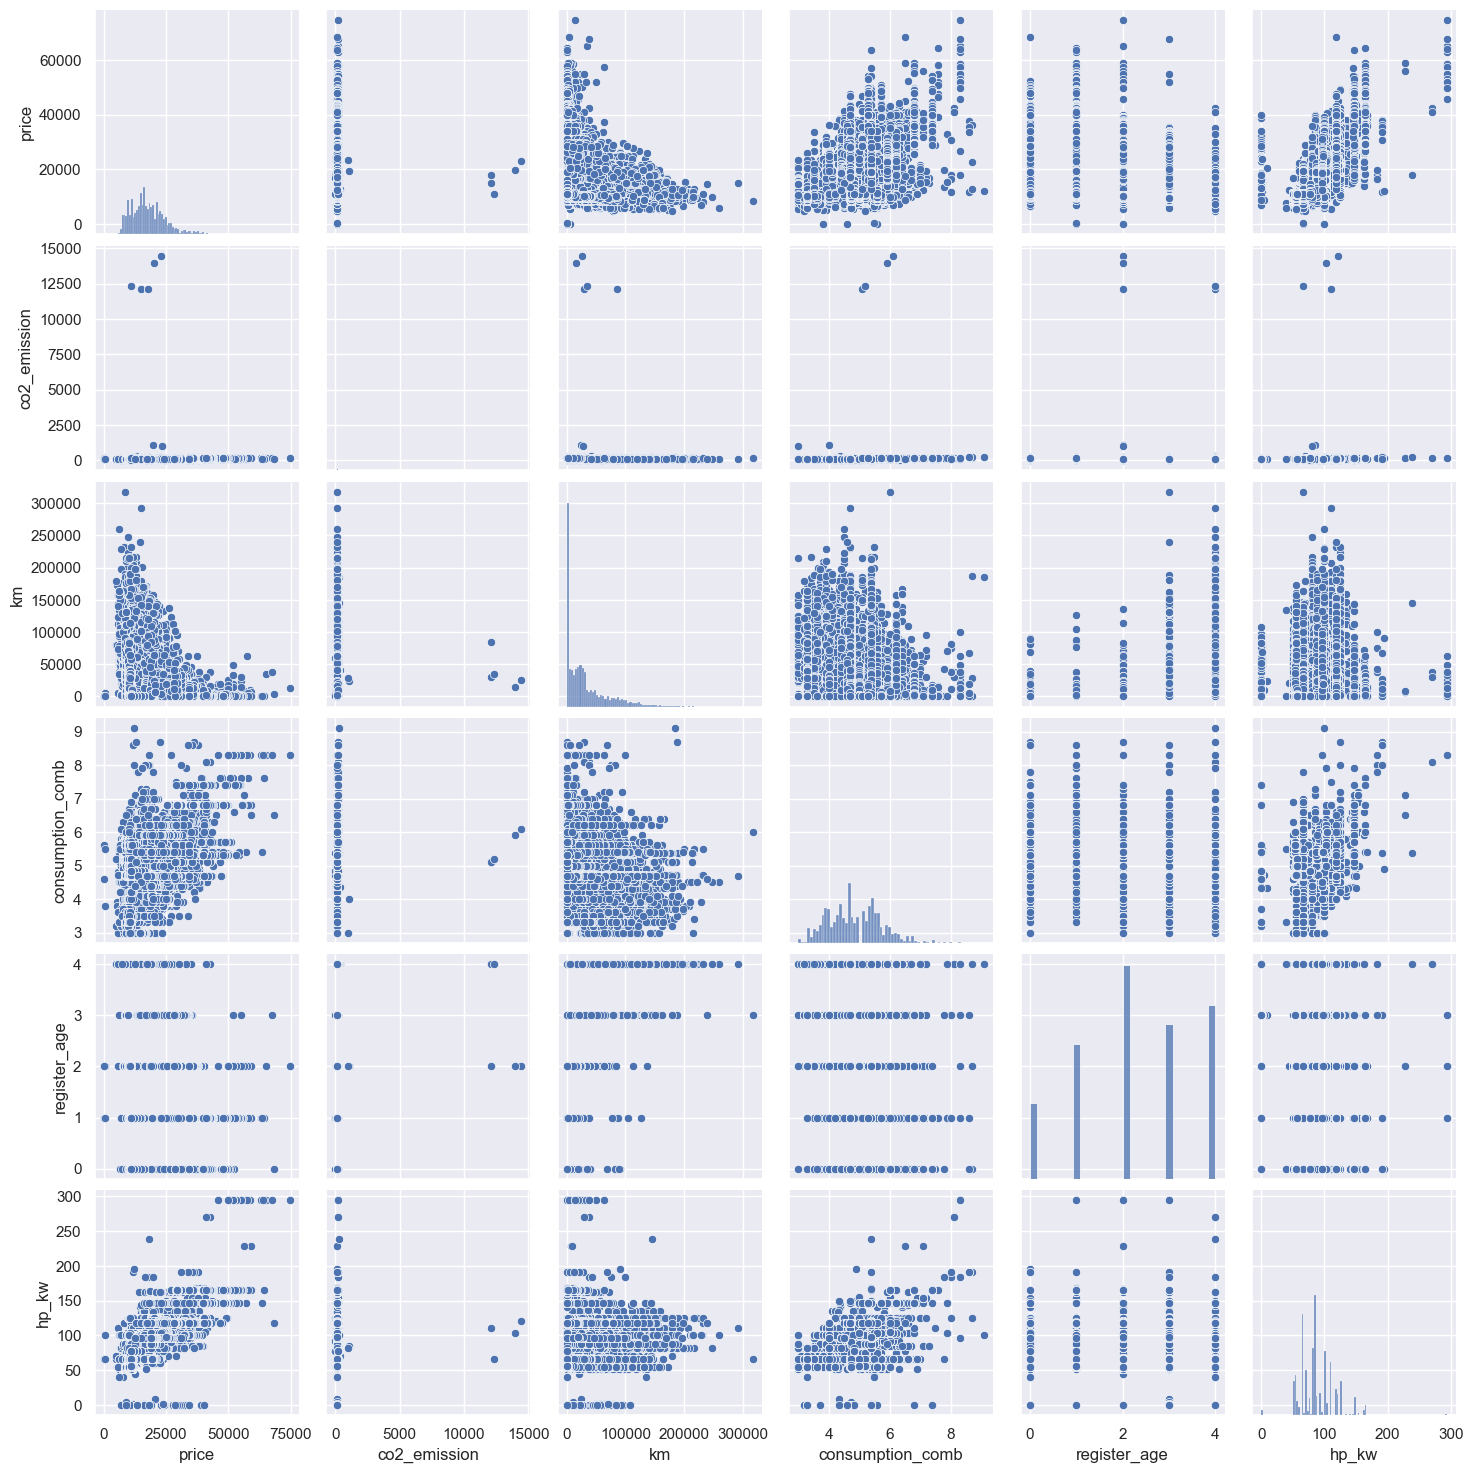

In [509]:
sns.set()

cols=["price", "co2_emission", "km", "consumption_comb", "register_age", "hp_kw"]

sns.pairplot(oto1[cols], size = 2.5)

plt.show()

In [510]:
oto1.co2_emission.describe()

count   15919.00
mean      122.56
std       248.45
min         0.00
25%       106.00
50%       116.00
75%       127.00
max     14457.00
Name: co2_emission, dtype: float64

In [514]:
oto1.drop("co2_emission", axis = 1, inplace = True)

KeyError: "['co2_emission'] not found in axis"

In [515]:
oto1.price.describe()

count   15919.00
mean    18019.90
std      7386.17
min        13.00
25%     12850.00
50%     16900.00
75%     21900.00
max     74600.00
Name: price, dtype: float64

In [516]:
oto1.price.sort_values().head(33)

8594       13
8828      120
6066      255
8829      331
8827     4950
8825     4990
8826     5250
8824     5300
13770    5445
8823     5450
8822     5490
8820     5499
3235     5555
8821     5600
13763    5700
13762    5800
13760    5850
13759    5890
8818     5890
13761    5900
13757    5900
13758    5900
13756    5938
8819     5950
8602     5970
8600     5970
8601     5970
8597     5990
13755    6000
13754    6000
5712     6000
8599     6100
8598     6200
Name: price, dtype: int64

In [517]:
oto1.drop(index = [8594, 8828, 6066,8829], axis = 0, inplace = True)

In [518]:
oto1.shape

(15915, 114)

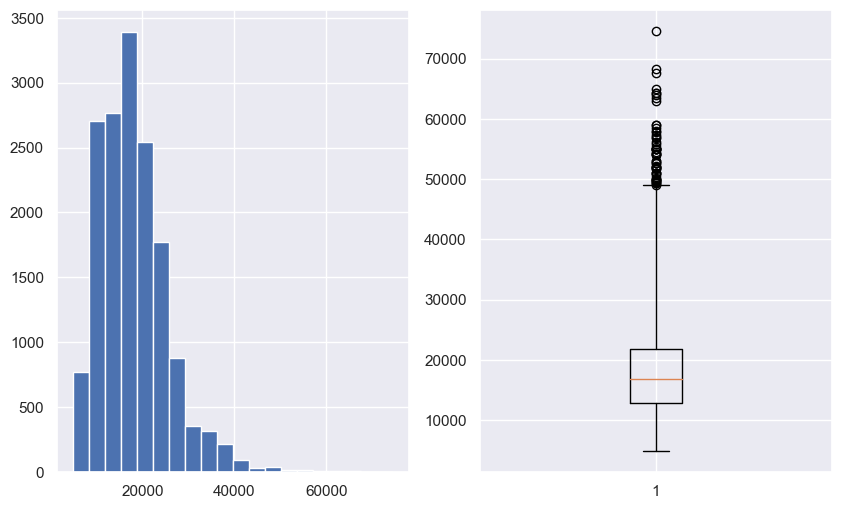

In [519]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(oto1.price, bins=20)

plt.subplot(122)
plt.boxplot(oto1.price, whis=3)

plt.show()

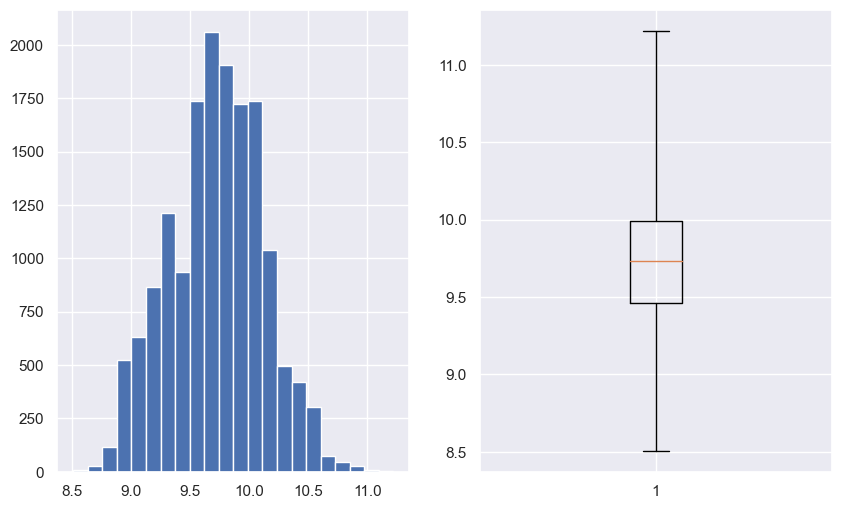

In [520]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(oto1.price), bins=22)

plt.subplot(122)
plt.boxplot(np.log(oto1.price), whis=2.3)

plt.show()

In [521]:
oto1.hp_kw.sort_values().head(55)

13633    0
13864    0
11013    0
1269     0
11012    0
10910    0
13566    0
10909    0
8269     0
11163    0
13951    0
10586    0
13570    0
13572    0
13649    0
14048    0
14050    0
14057    0
14894    0
13646    0
13481    0
11183    0
12450    0
13476    0
13474    0
13471    0
13733    0
13422    0
13729    0
13488    0
13397    0
11237    0
2500     0
10167    0
13271    0
13726    0
13198    0
13158    0
4259     0
13144    0
12767    0
7670     0
14896    0
14895    0
14898    0
15261    0
15303    0
15347    0
15435    0
15438    0
15439    0
15461    0
15462    0
15468    0
15472    0
Name: hp_kw, dtype: int64

In [522]:
oto1.hp_kw.unique()

array([ 66, 141,  85,  70,  92, 112,  60,  71,  67, 110,  93, 147,  86,
       140,  87,   0,  81,  82, 135, 132, 100,  96, 162, 150, 294, 228,
       270, 137,   9, 133,  77, 101,  78, 103,   1,  74, 118,  84,  88,
        80,  76, 149,  44,  51,  55,  52,  63,  40,  65,  75, 125, 120,
       184, 239, 121, 143, 191,  89, 195, 127, 122, 154, 155, 104, 123,
       146,  90,  53,  54,  56, 164,   4, 163,  57, 119, 165, 117, 115,
        98, 168, 167])

In [523]:
oto1.hp_kw.loc[oto1.hp_kw < 40] = np.nan

In [524]:
oto1.hp_kw.isnull().sum()

110

In [525]:
oto1["hp_kw"] = oto1["hp_kw"].fillna(oto1.groupby("make_model")["hp_kw"].transform("median"))

In [526]:
oto1.hp_kw.isnull().sum()

0

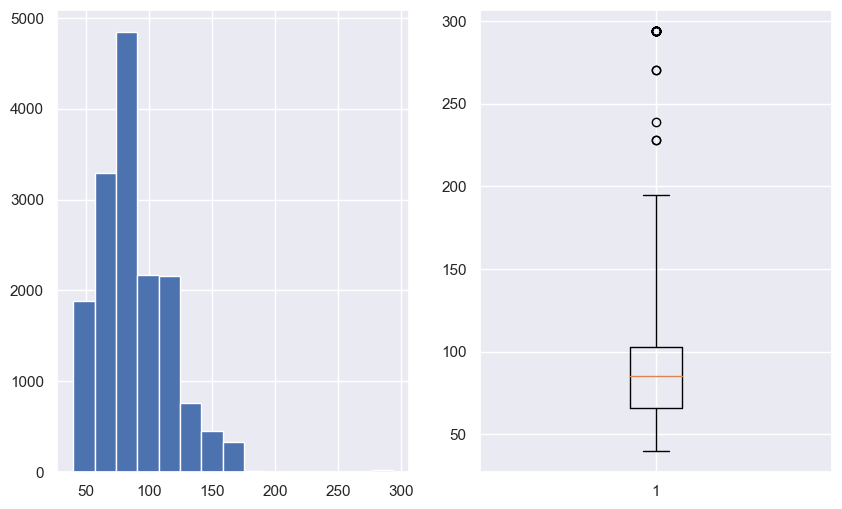

In [527]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(oto1.hp_kw, bins=15)

plt.subplot(122)
plt.boxplot(oto1.hp_kw, whis=2.5)

plt.show()

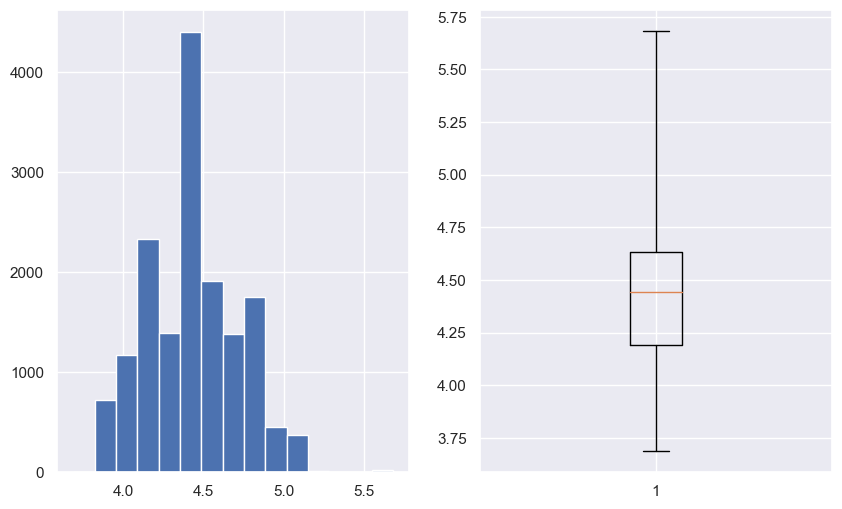

In [528]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(oto1.hp_kw), bins=15)

plt.subplot(122)
plt.boxplot(np.log(oto1.hp_kw), whis=2.5)

plt.show()

In [529]:
oto1.hp_kw.sort_values().head(55)

13759   40.00
8857    40.00
8408    44.00
9781    51.00
9159    51.00
10288   51.00
10289   51.00
10290   51.00
10291   51.00
10292   51.00
9158    51.00
9382    51.00
10294   51.00
10295   51.00
10296   51.00
10297   51.00
10298   51.00
10300   51.00
10301   51.00
10302   51.00
10303   51.00
10304   51.00
10305   51.00
10306   51.00
10287   51.00
10286   51.00
10285   51.00
10284   51.00
9166    51.00
10268   51.00
10269   51.00
9165    51.00
10270   51.00
10271   51.00
9371    51.00
9164    51.00
10272   51.00
10273   51.00
10274   51.00
10275   51.00
10276   51.00
10277   51.00
10278   51.00
10279   51.00
10280   51.00
10281   51.00
10282   51.00
9376    51.00
9161    51.00
9160    51.00
10283   51.00
10307   51.00
9383    51.00
9384    51.00
10308   51.00
Name: hp_kw, dtype: float64

In [530]:
oto1.shape

(15915, 114)

In [531]:
oto1.head()

,make_model,body_type,price,vat,km,type,upholstery,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,gear_type,drive_chain,body_color,displacement_cc,register_age,fuel_new,nr_doors,nr_seats,hp_kw
0,Audi A1,Sedans,15770,VAT deductible,56013.00,Used,Cloth,6.00,2,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,Automatic,front,Black,1422.00,4.00,Diesel,5.00,5.00,66.00
1,Audi A1,Sedans,14500,Price negotiable,80000.00,Used,Cloth,7.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,Automatic,front,Red,1798.00,3.00,Benzine,3.00,4.00,141.00
2,Audi A1,Sedans,14640,VAT deductible,83450.00,Used,Cloth,6.00,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.80,Automatic,front,Black,1598.00,4.00,Diesel,4.00,4.00,85.00
3,Audi A1,Sedans,14500,VAT deductible,73000.00,Used,Cloth,6.00,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.80,Automatic,front,Brown,1422.00,4.00,Diesel,3.00,4.00,66.00
4,Audi A1,Sedans,16790,VAT deductible,16200.00,Used,Cloth,6.00,1,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,4.10,Automatic,front,Black,1422.00,4.00,Diesel,5.00,5.00,66.00


In [532]:
oto2 = pd.get_dummies(oto1)

In [533]:
oto2.shape

(15915, 153)

In [534]:
oto2.head()

,price,km,gears,previous_owner,inspection_new_bool,cc_air conditioning,cc_air suspension,cc_armrest,cc_automatic climate control,cc_auxiliary heating,cc_cruise control,cc_electric starter,cc_electric tailgate,cc_electrical side mirrors,cc_electrically adjustable seats,cc_electrically heated windshield,cc_heads-up display,cc_heated steering wheel,cc_hill holder,cc_keyless central door lock,cc_leather seats,cc_leather steering wheel,cc_light sensor,cc_lumbar support,cc_massage seats,cc_multi-function steering wheel,cc_navigation system,cc_panorama roof,cc_park distance control,cc_parking assist system camera,cc_parking assist system self-steering,cc_parking assist system sensors front,cc_parking assist system sensors rear,cc_power windows,cc_rain sensor,cc_seat heating,cc_seat ventilation,cc_split rear seats,cc_start-stop system,cc_sunroof,cc_tinted windows,cc_wind deflector,cc_windshield,em_bluetooth,em_cd player,em_digital radio,em_hands-free equipment,em_mp3,em_on-board computer,em_radio,em_sound system,em_television,em_usb,ex_alloy wheels,ex_cab or rented car,ex_catalytic converter,ex_handicapped enabled,ex_right hand drive,ex_roof rack,ex_shift paddles,ex_ski bag,ex_sliding door,ex_sport package,ex_sport seats,ex_sport suspension,ex_touch screen,ex_trailer hitch,ex_tuned car,ex_voice control,ex_winter tyres,ss_abs,ss_adaptive cruise control,ss_adaptive headlights,ss_alarm system,ss_blind spot monitor,ss_central door lock,ss_central door lock with remote control,ss_daytime running lights,ss_driver drowsiness detection,ss_driver-side airbag,ss_electronic stability control,ss_emergency brake assistant,ss_emergency system,ss_fog lights,ss_head airbag,ss_immobilizer,ss_isofix,ss_led daytime running lights,ss_led headlights,ss_lane departure warning system,ss_night view assist,ss_passenger-side airbag,ss_power steering,ss_rear airbag,ss_side airbag,ss_tire pressure monitoring system,ss_traction control,ss_traffic sign recognition,ss_xenon headlights,consumption_comb,displacement_cc,register_age,nr_doors,nr_seats,hp_kw,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,upholstery_Cloth,upholstery_Part/Full Leather,gear_type_Automatic,gear_type_Manual,gear_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,fuel_new_Benzine,fuel_new_Diesel,fuel_new_LPG/CNG
0,15770,56013.00,6.00,2,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.80,1422.00,4.00,5.00,5.00,66.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,14500,80000.00,7.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.60,1798.00,3.00,3.00,4.00,141.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,14640,83450.00,6.00,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.80,1598.00,4.00,4.00,4.00,85.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,14500,73000